In [7]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
# 获取配置
task = get_param_in_cwd('task_column') or 'label'
bst_model = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x.replace('.png', '.gz')}")
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_[['ID'] + labels]
label_data

Index(['ID', 'group', 'label'], dtype='object')


,ID,label
0,DONG HUIP00343158.nii.gz,0
1,YAO YU MING_P00096109.nii.gz,0
2,DENG YUE YINGP00332485.nii.gz,0
3,JIANG XIU JUAN_P00104388.nii.gz,0
4,DAI_XIAO_HUI_P00307303.nii.gz,0
...,...,...
284,ZHAO_YUN_P00310065.nii.gz,0
285,ZHAO_ZHANG_ZHI_P00206369.nii.gz,0
286,ZHENG_XI_DE_P00266862.nii.gz,0
287,ZHOU_RONG_P00306340.nii.gz,0


,ID,-0_x,Radiomics,-0_y,DeepLearning,label
0,CHEN YU CHUNP00365376.nii.gz,0.845,0.155,0.993,0.007,0
1,DENG MEIP00329833.nii.gz,0.646,0.354,0.995,0.005,0
2,GONG_YAN_JU_P00306727.nii.gz,0.845,0.155,0.900,0.100,0
3,HAN_RONG_SHENG_P00189984.nii.gz,0.845,0.155,0.833,0.167,0
4,HUANG ZHI LIANGP00347688.nii.gz,0.845,0.155,0.965,0.035,0
...,...,...,...,...,...,...
141,ZHU AI FENG_P00309875.nii.gz,0.845,0.155,0.936,0.064,0
142,ZHU_BEN_YING_P00198073.nii.gz,0.845,0.155,0.981,0.019,0
143,ZHU_SHI_HUAN_P00291363.nii.gz,0.723,0.277,0.863,0.137,0
144,LIU_JIN_YING_P00304462.nii.gz,0.845,0.155,0.884,0.116,0


,Signature,Accuracy,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Cohort
0,Radiomics,0.890,0.953,0.9147 - 0.9918,0.929,0.881,0.650,0.981,0.650,0.929,0.765,0.486,train
1,DeepLearning,0.815,0.899,0.8378 - 0.9594,0.786,0.822,0.512,0.942,0.512,0.786,0.620,0.207,train


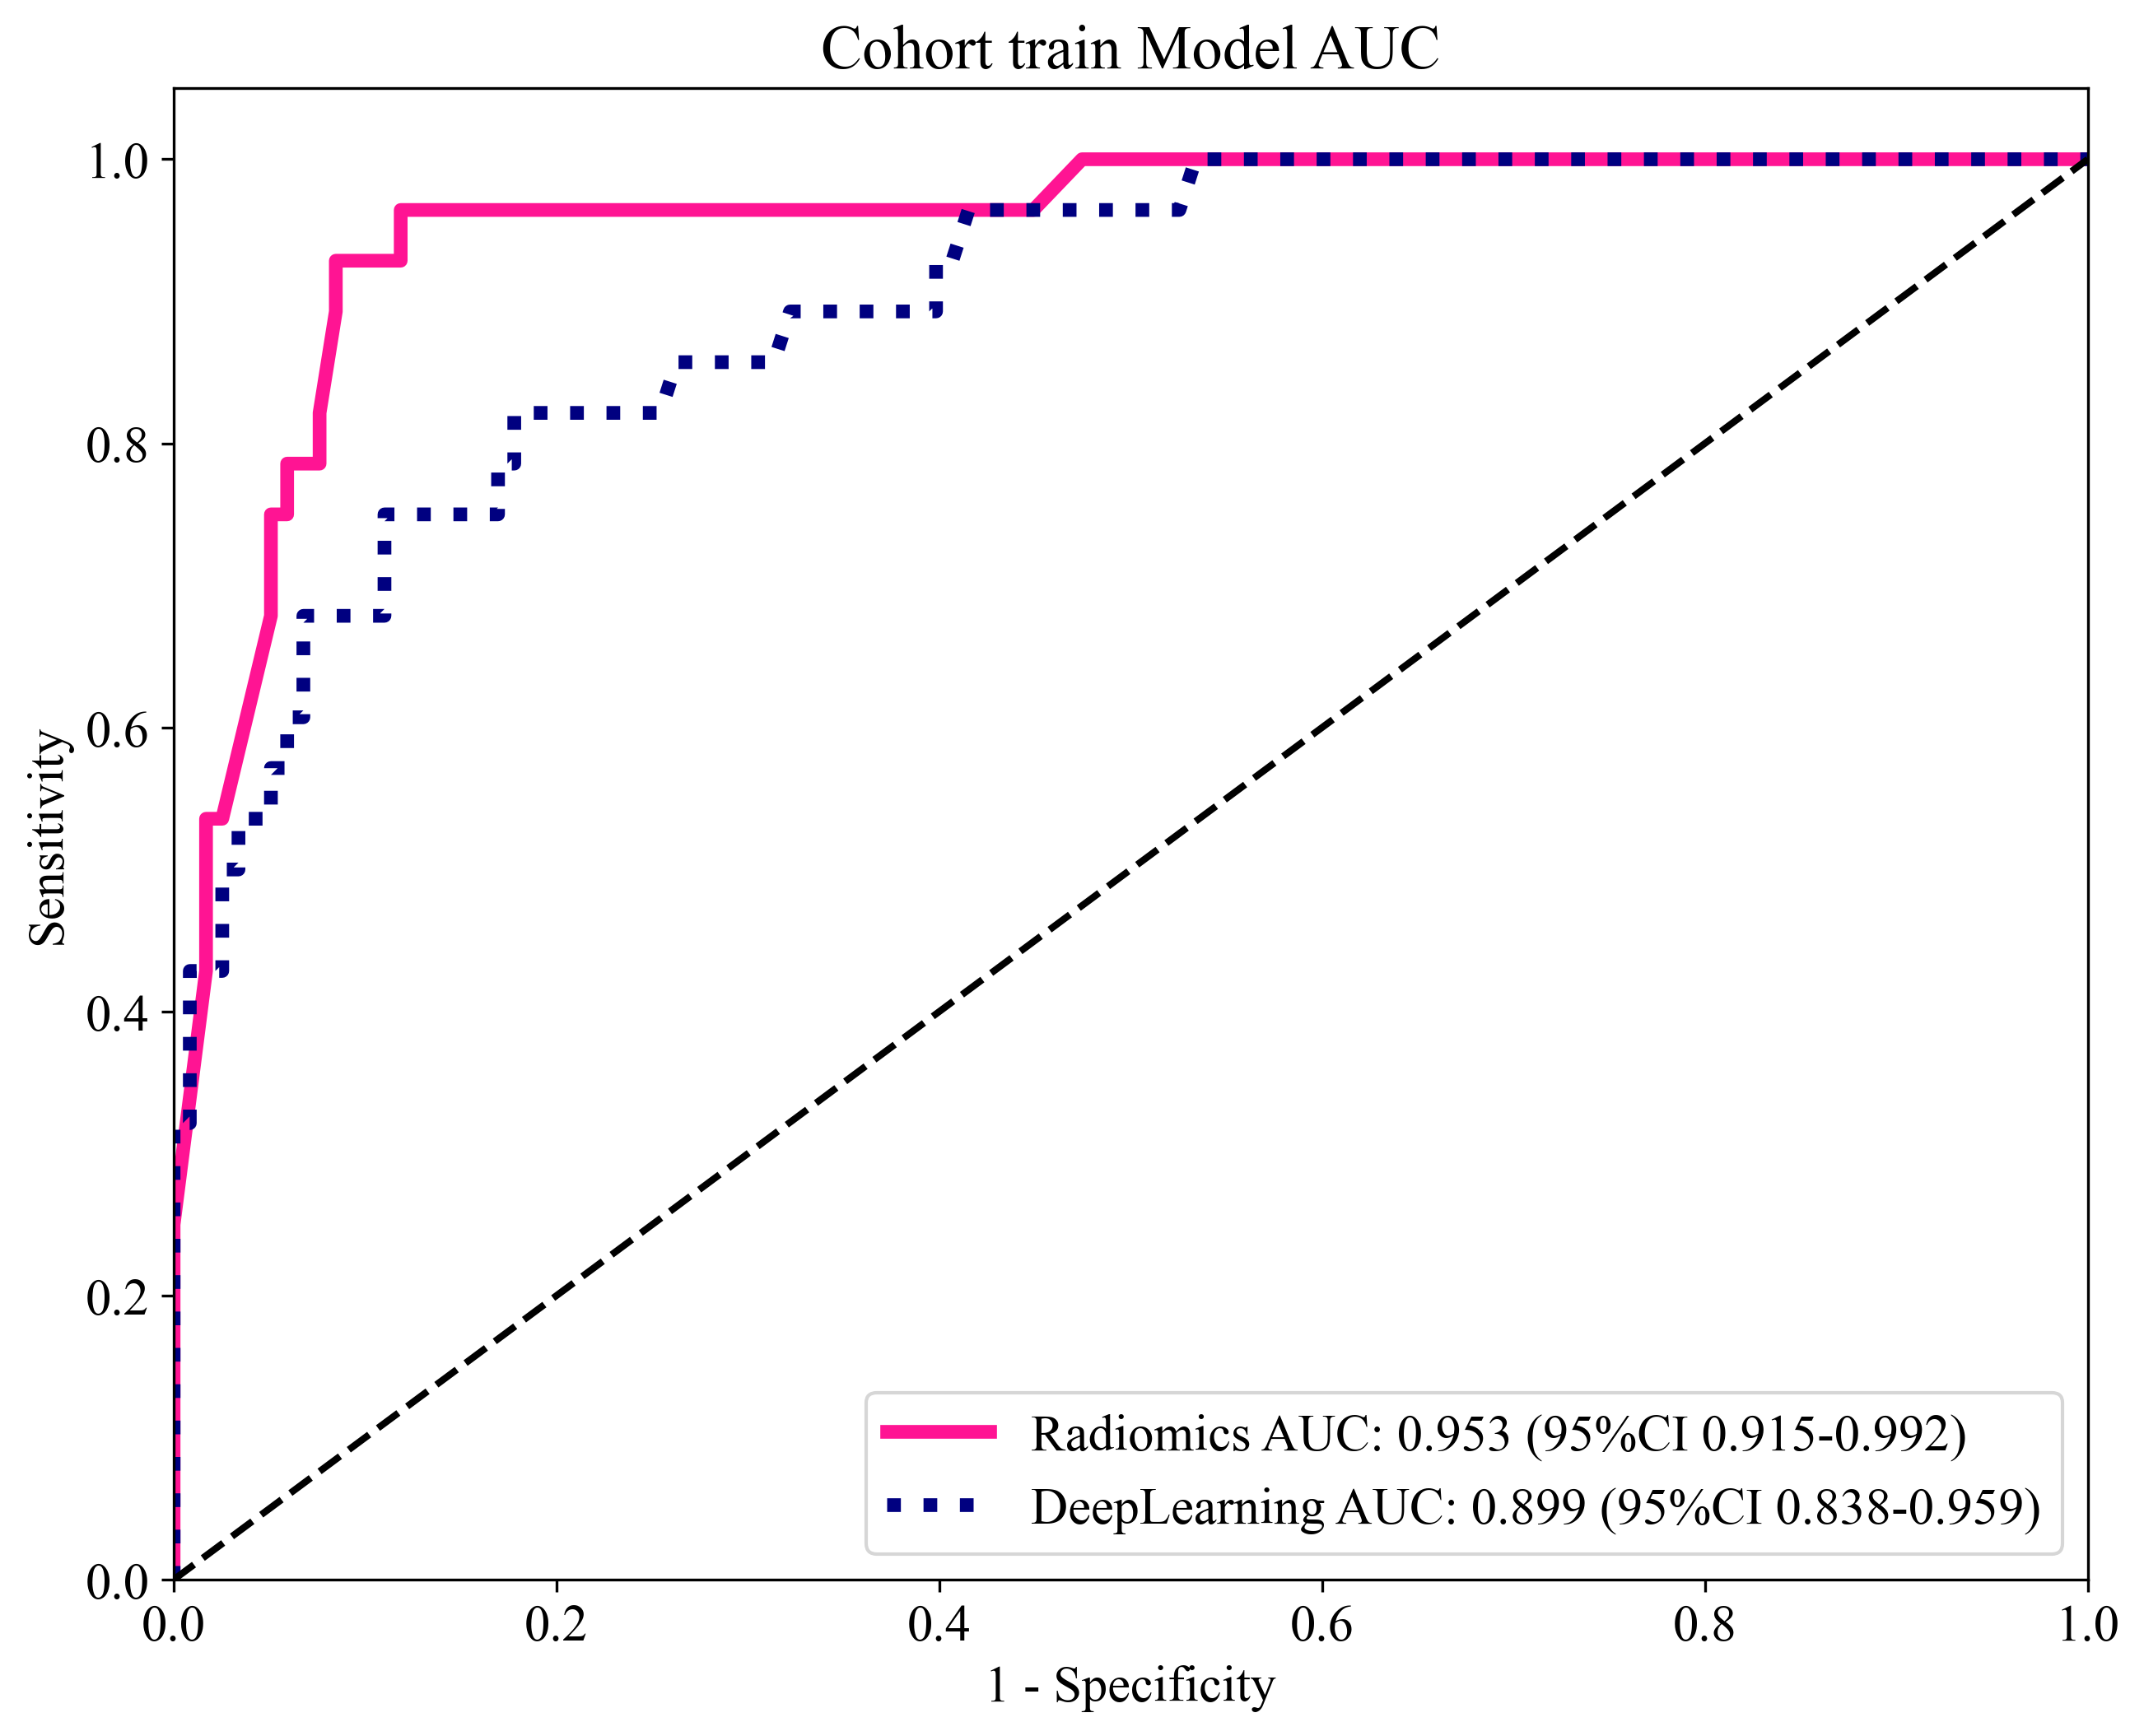

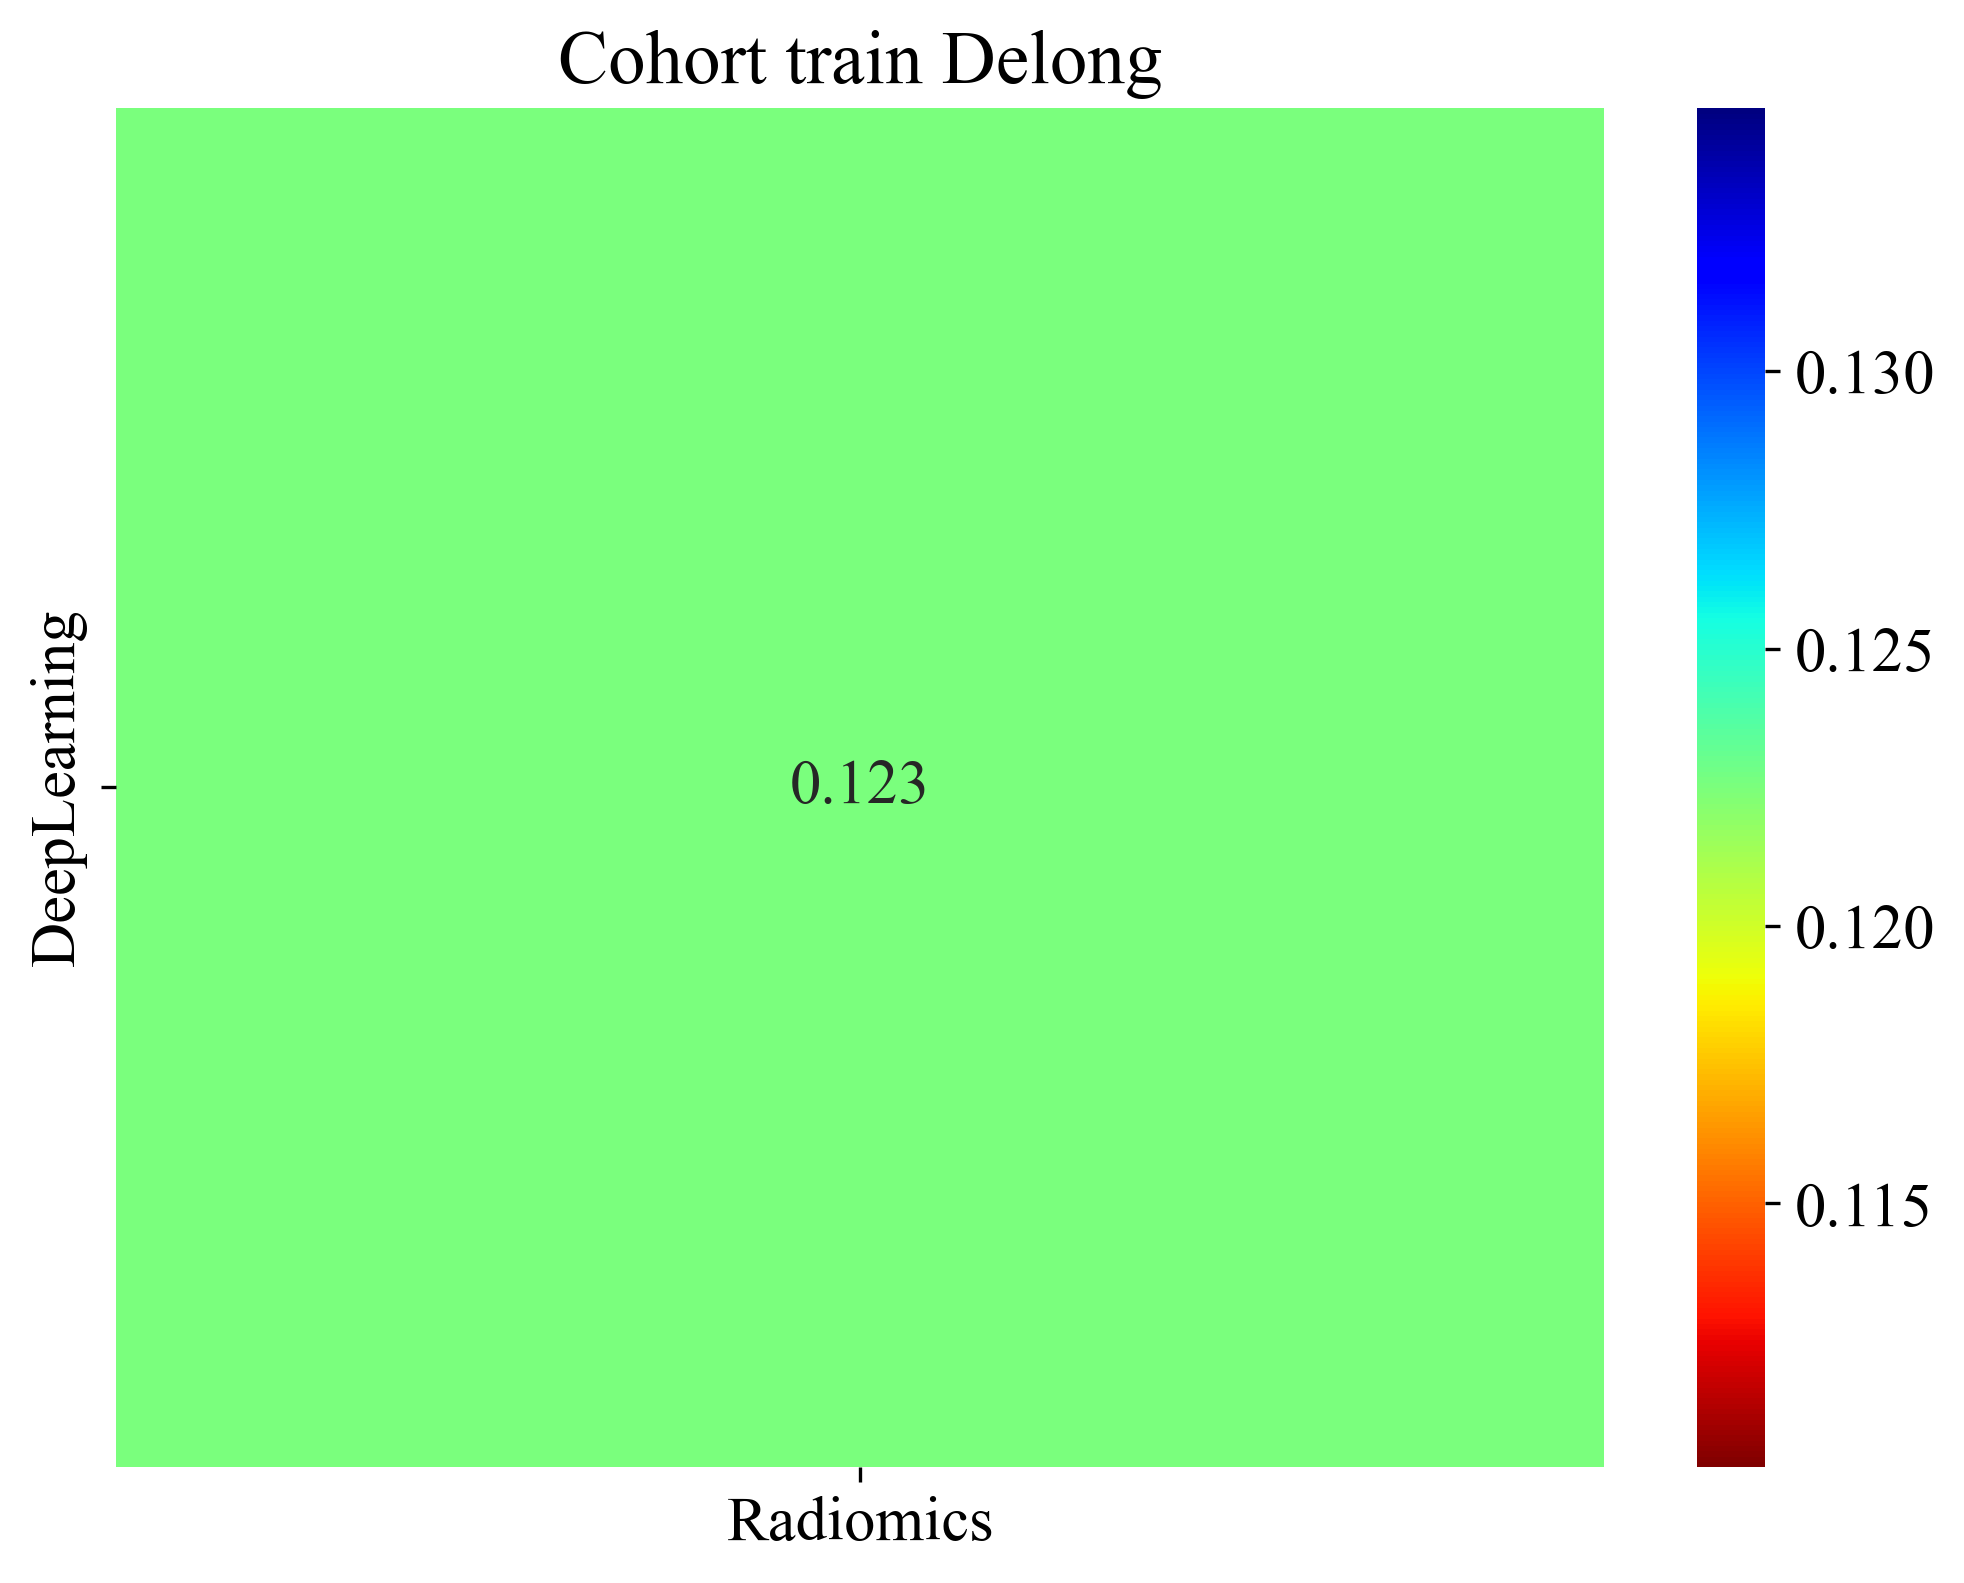

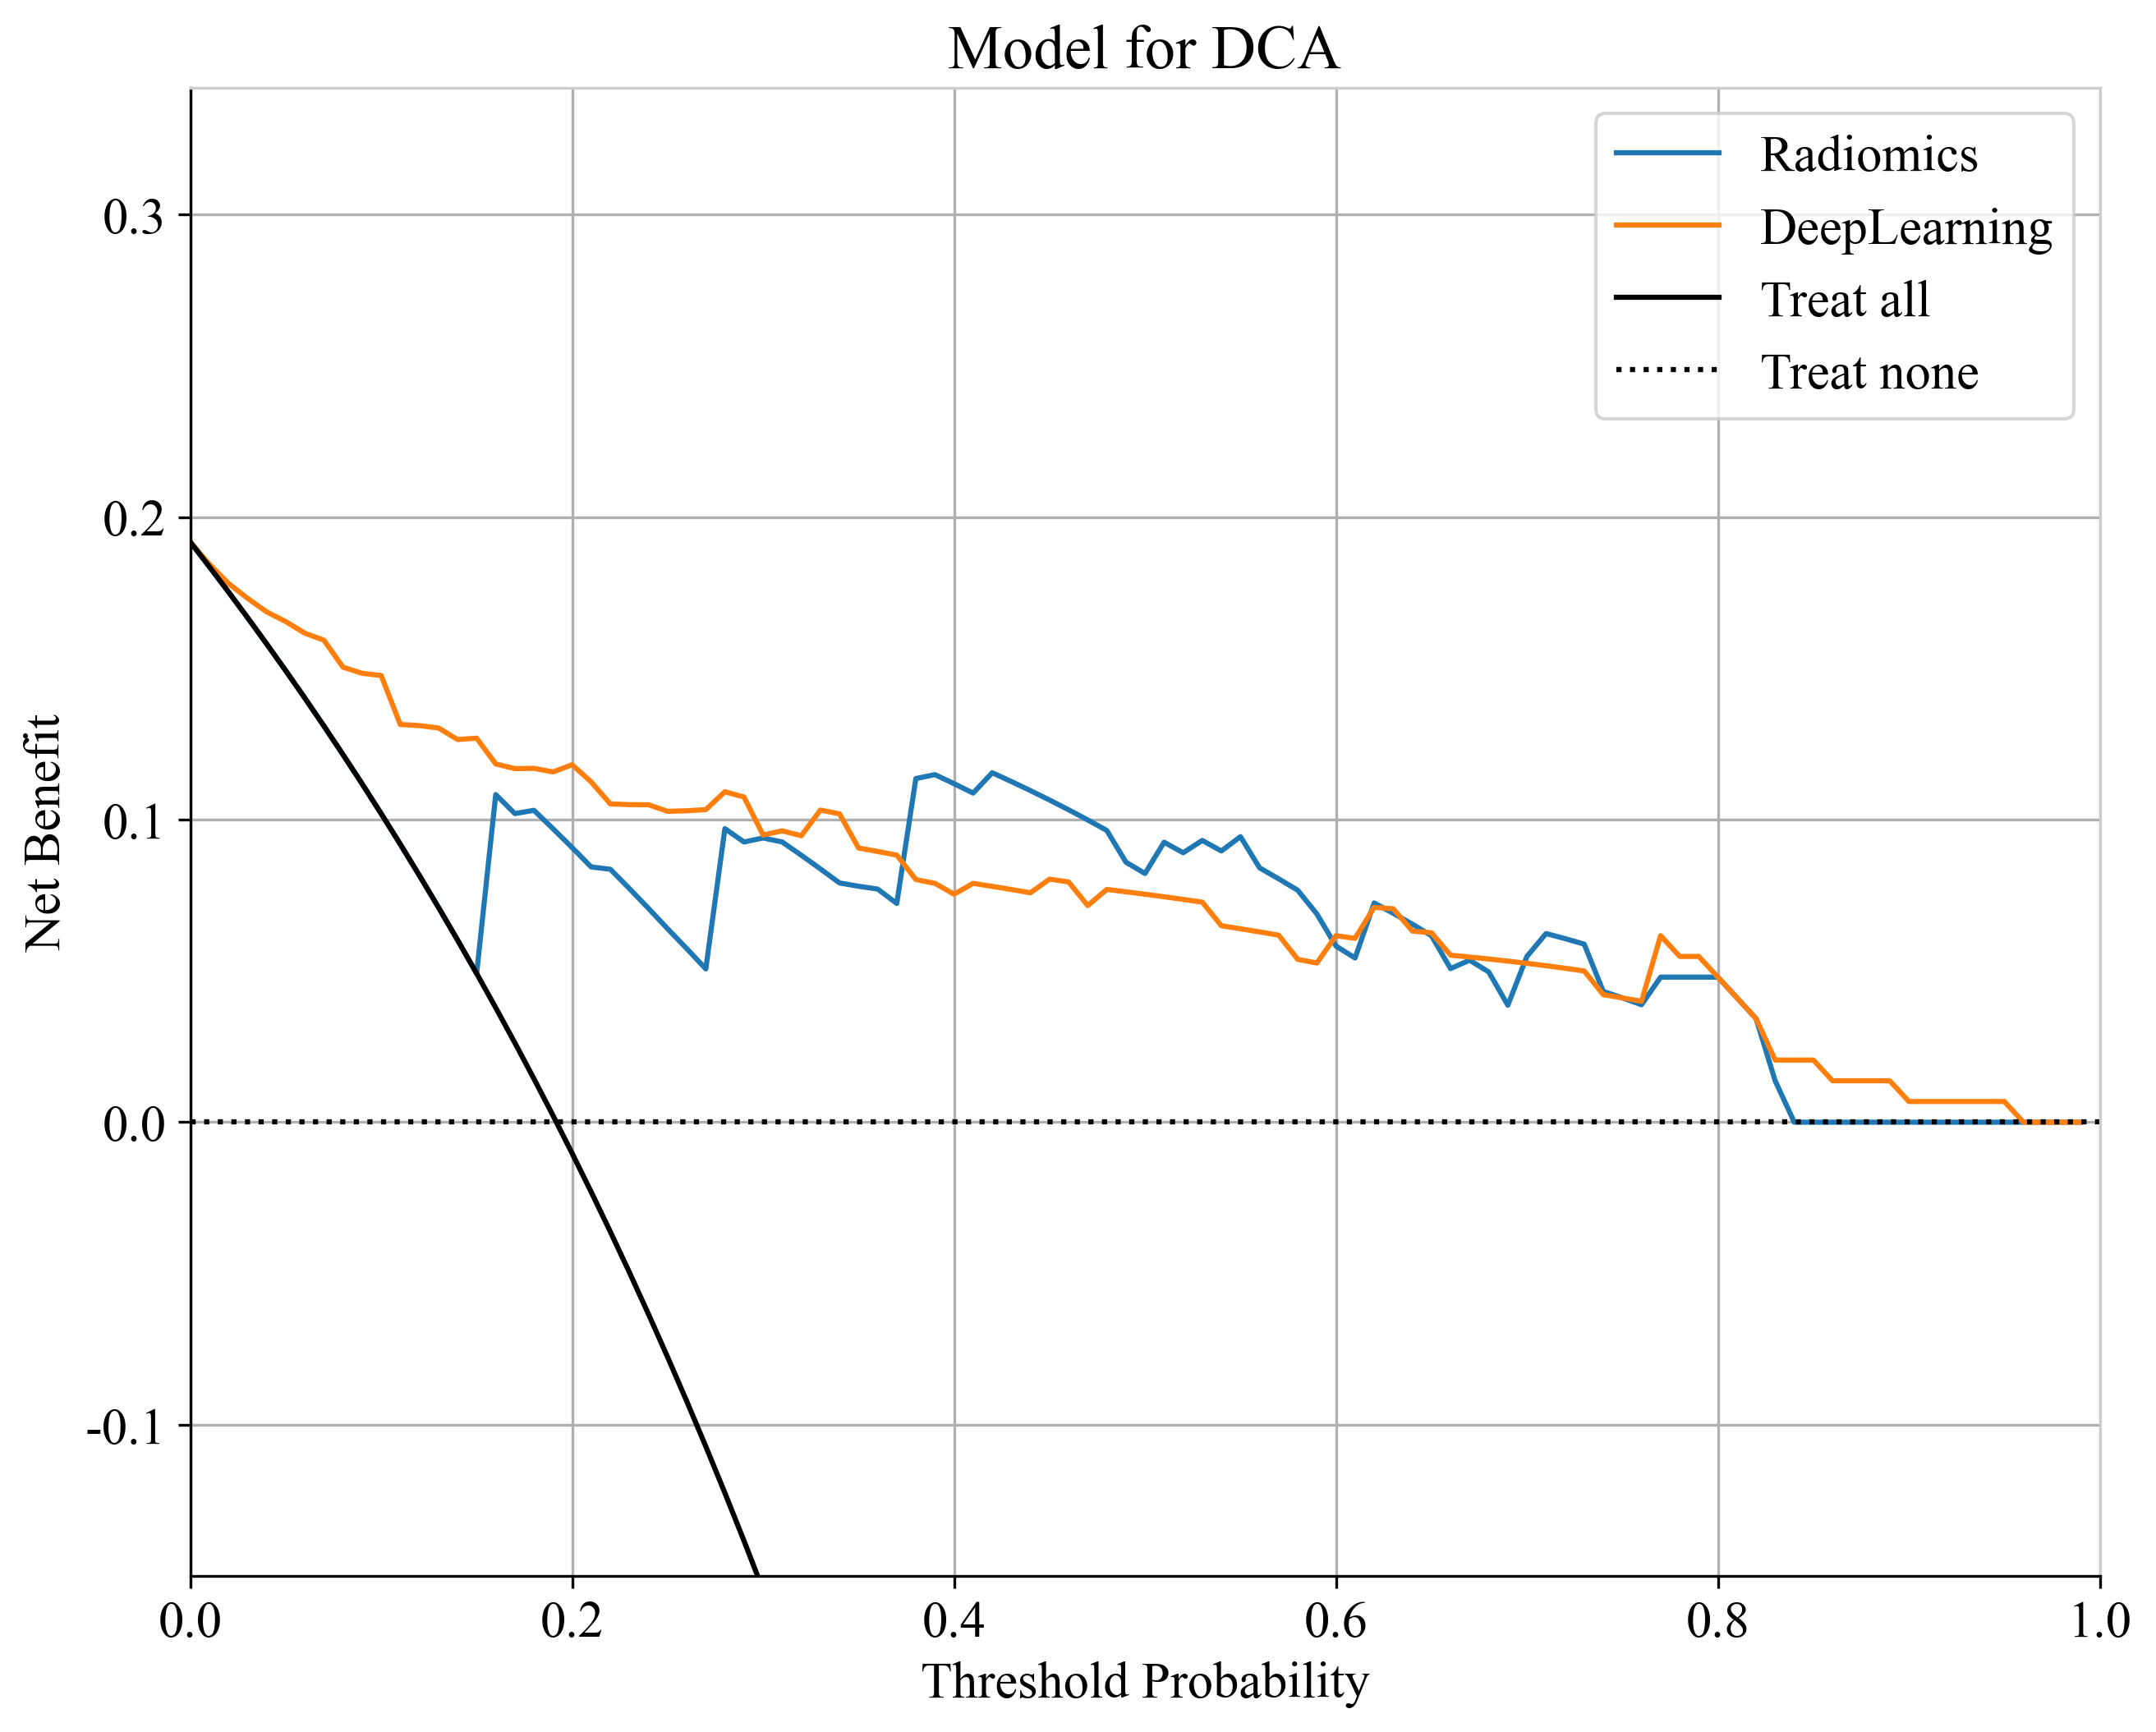

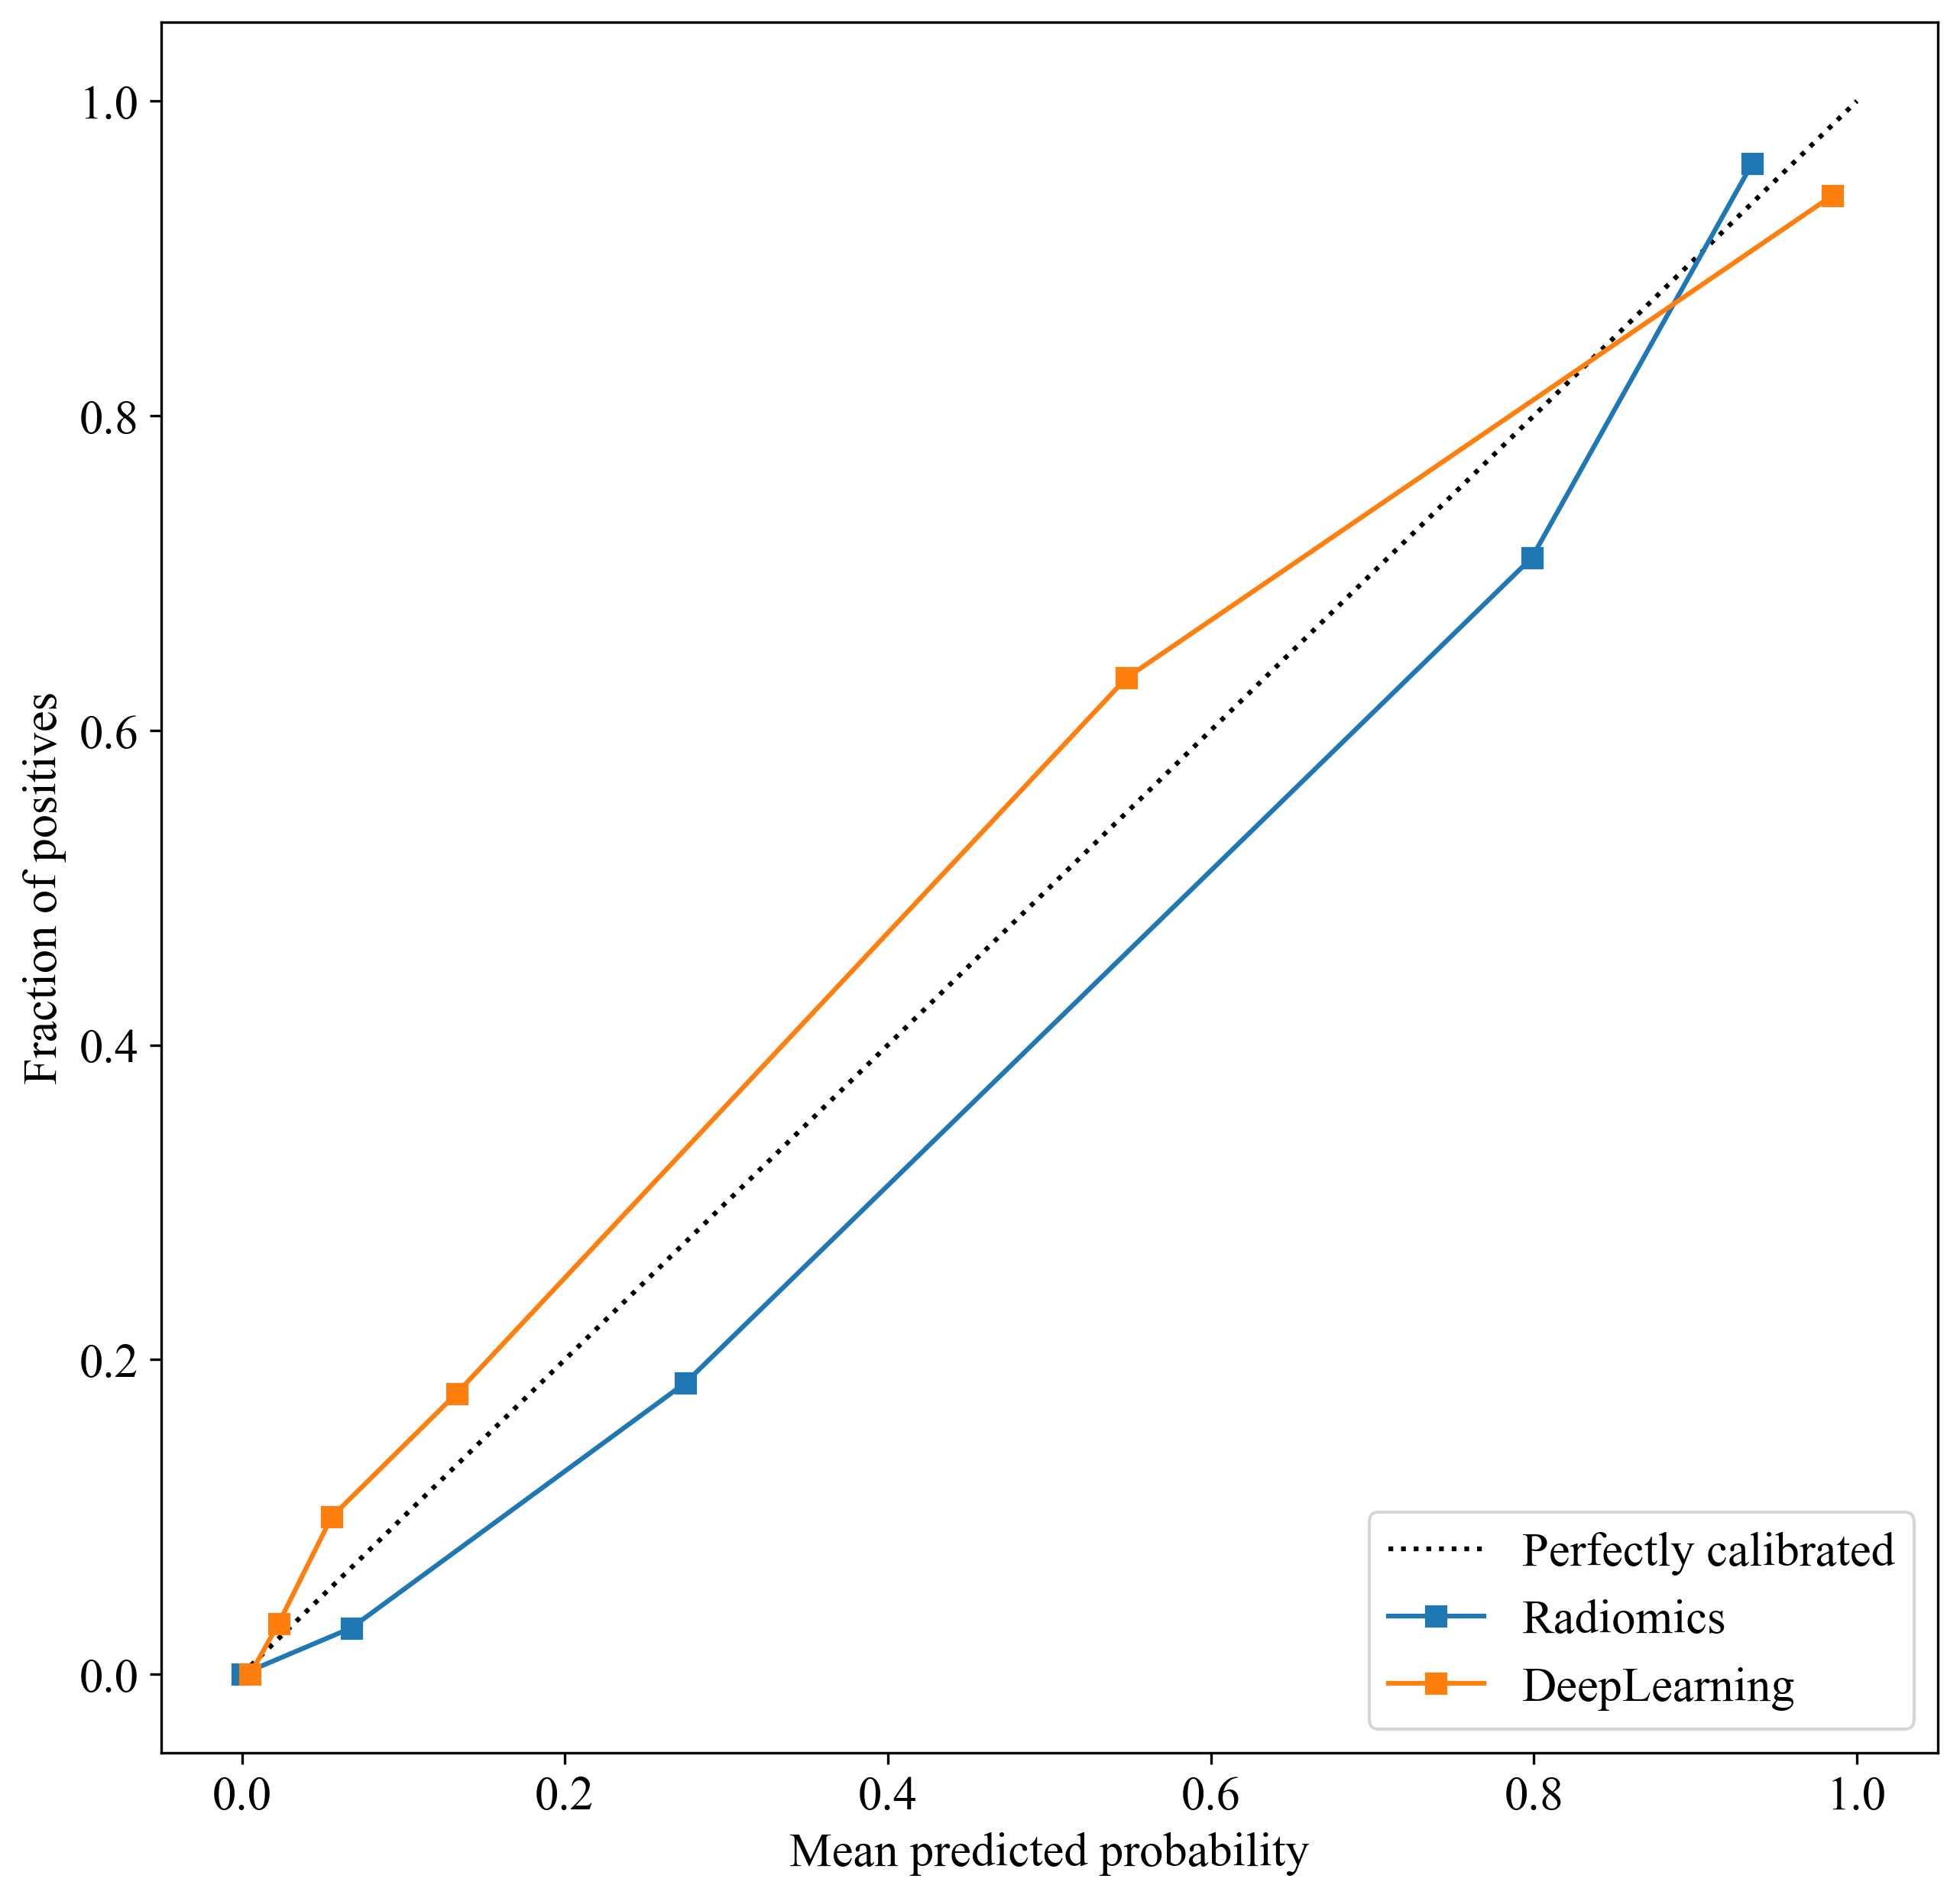

,ID,-0_x,Radiomics,-0_y,DeepLearning,label
0,DONG_RUI_P00285952.nii.gz,0.845,0.155,0.968,0.032,0
1,HE FENG YINGP00347123.nii.gz,0.845,0.155,0.980,0.020,0
2,LI SHU ZHEN_P00160030.nii.gz,0.845,0.155,0.999,0.001,0
3,LIU SHI YOU_P00104804.nii.gz,0.766,0.234,0.786,0.214,0
4,LIU_MIAO_P00192721.nii.gz,0.845,0.155,0.848,0.152,0
...,...,...,...,...,...,...
58,ZHOU_LAN_YING_P00283211.nii.gz,0.845,0.155,0.964,0.036,0
59,ZHOU_YUE_LAN_P00544893.nii.gz,0.412,0.588,0.729,0.271,1
60,ZHU CHUN MEI_P00158087.nii.gz,0.723,0.277,0.933,0.067,0
61,ZHU_XIU_HUAP00299690.nii.gz,0.845,0.155,0.837,0.163,0


,Signature,Accuracy,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Cohort
0,Radiomics,0.890,0.953,0.9147 - 0.9918,0.929,0.881,0.650,0.981,0.650,0.929,0.765,0.486,train
1,DeepLearning,0.815,0.899,0.8378 - 0.9594,0.786,0.822,0.512,0.942,0.512,0.786,0.620,0.207,train
2,Radiomics,0.825,0.833,0.7067 - 0.9595,0.588,0.913,0.714,0.857,0.714,0.588,0.645,0.546,val
3,DeepLearning,0.825,0.880,0.7802 - 0.9794,0.824,0.826,0.636,0.927,0.636,0.824,0.718,0.236,val


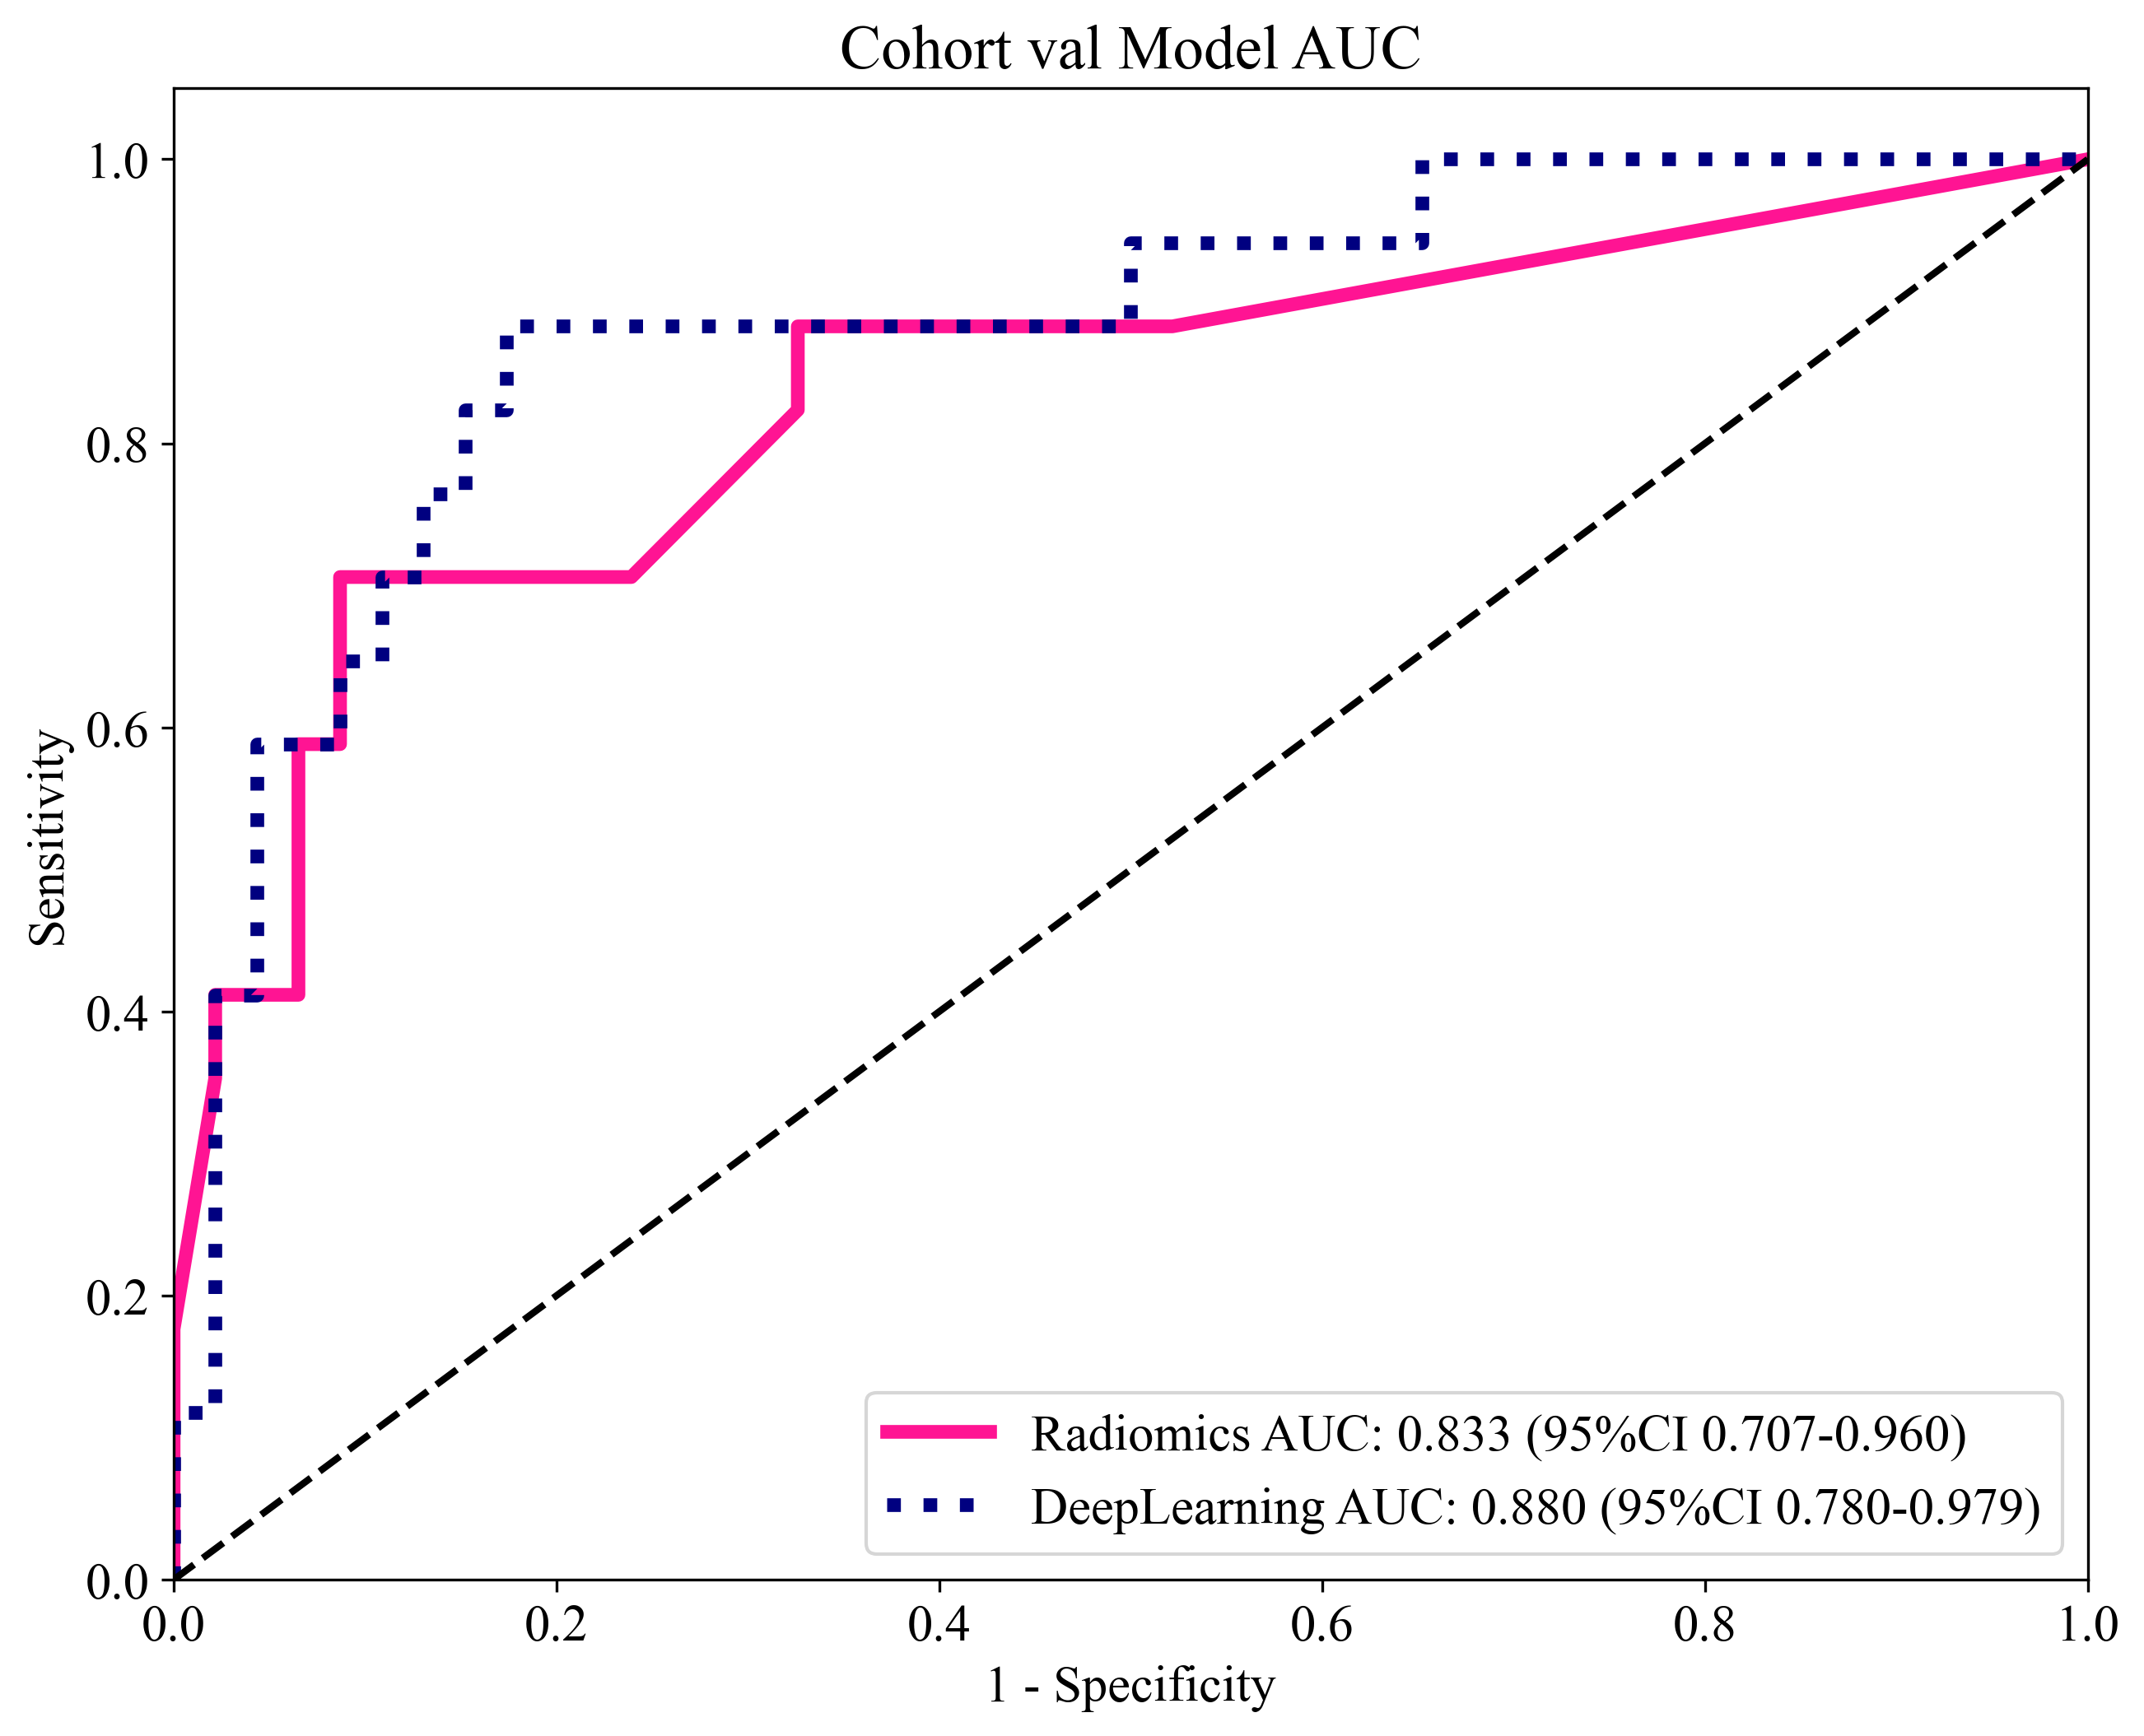

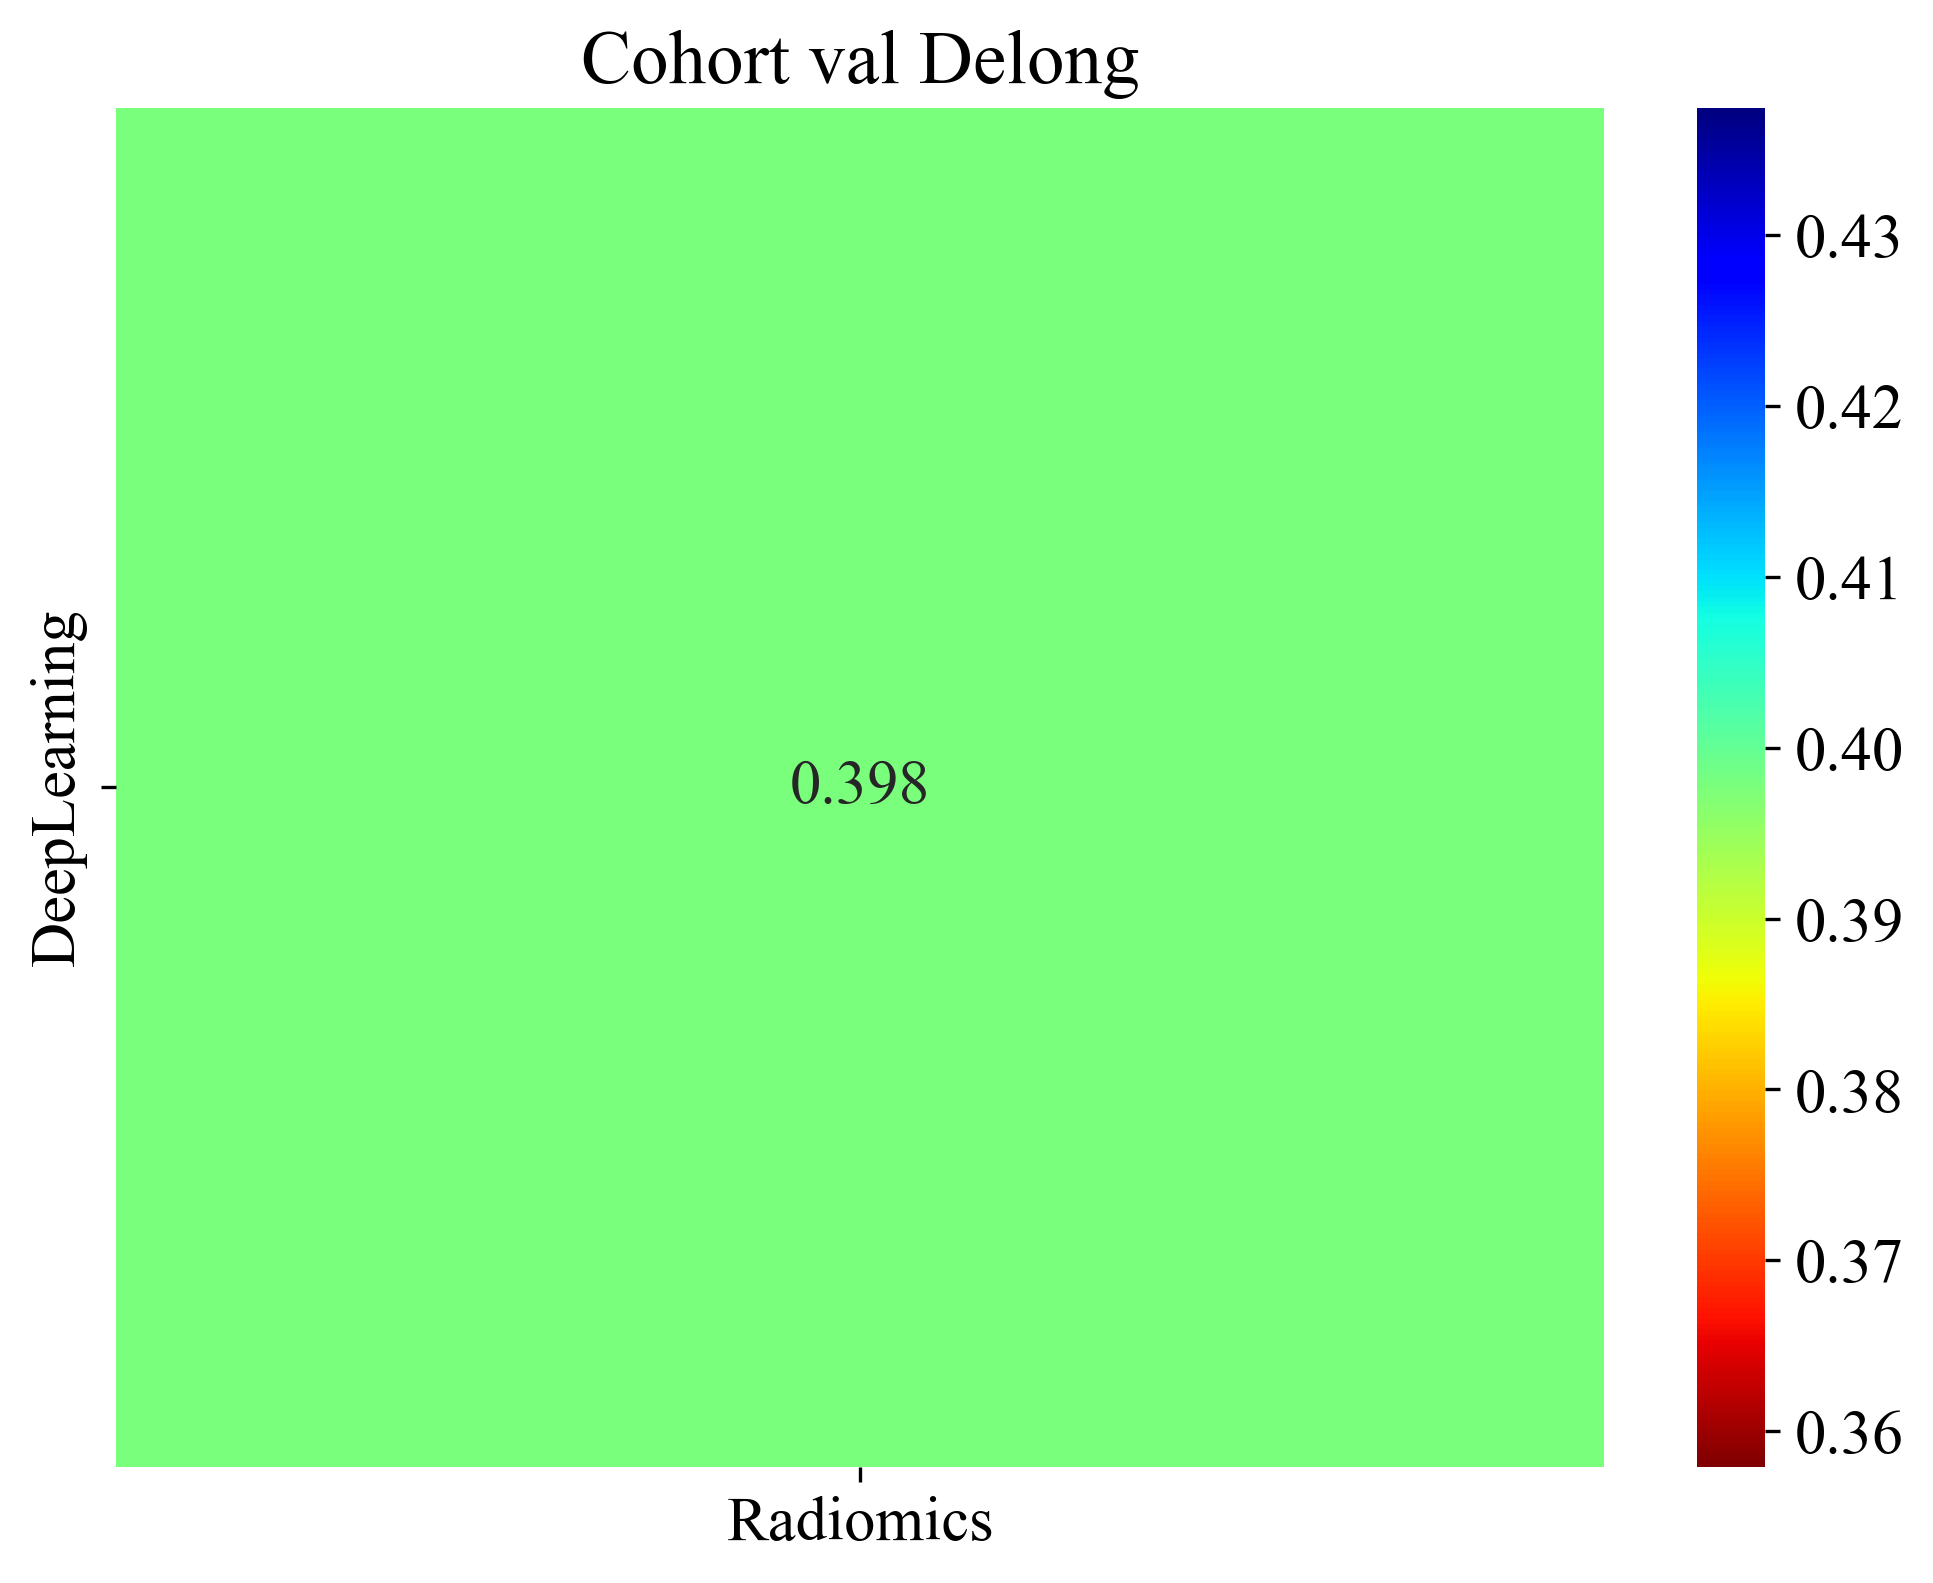

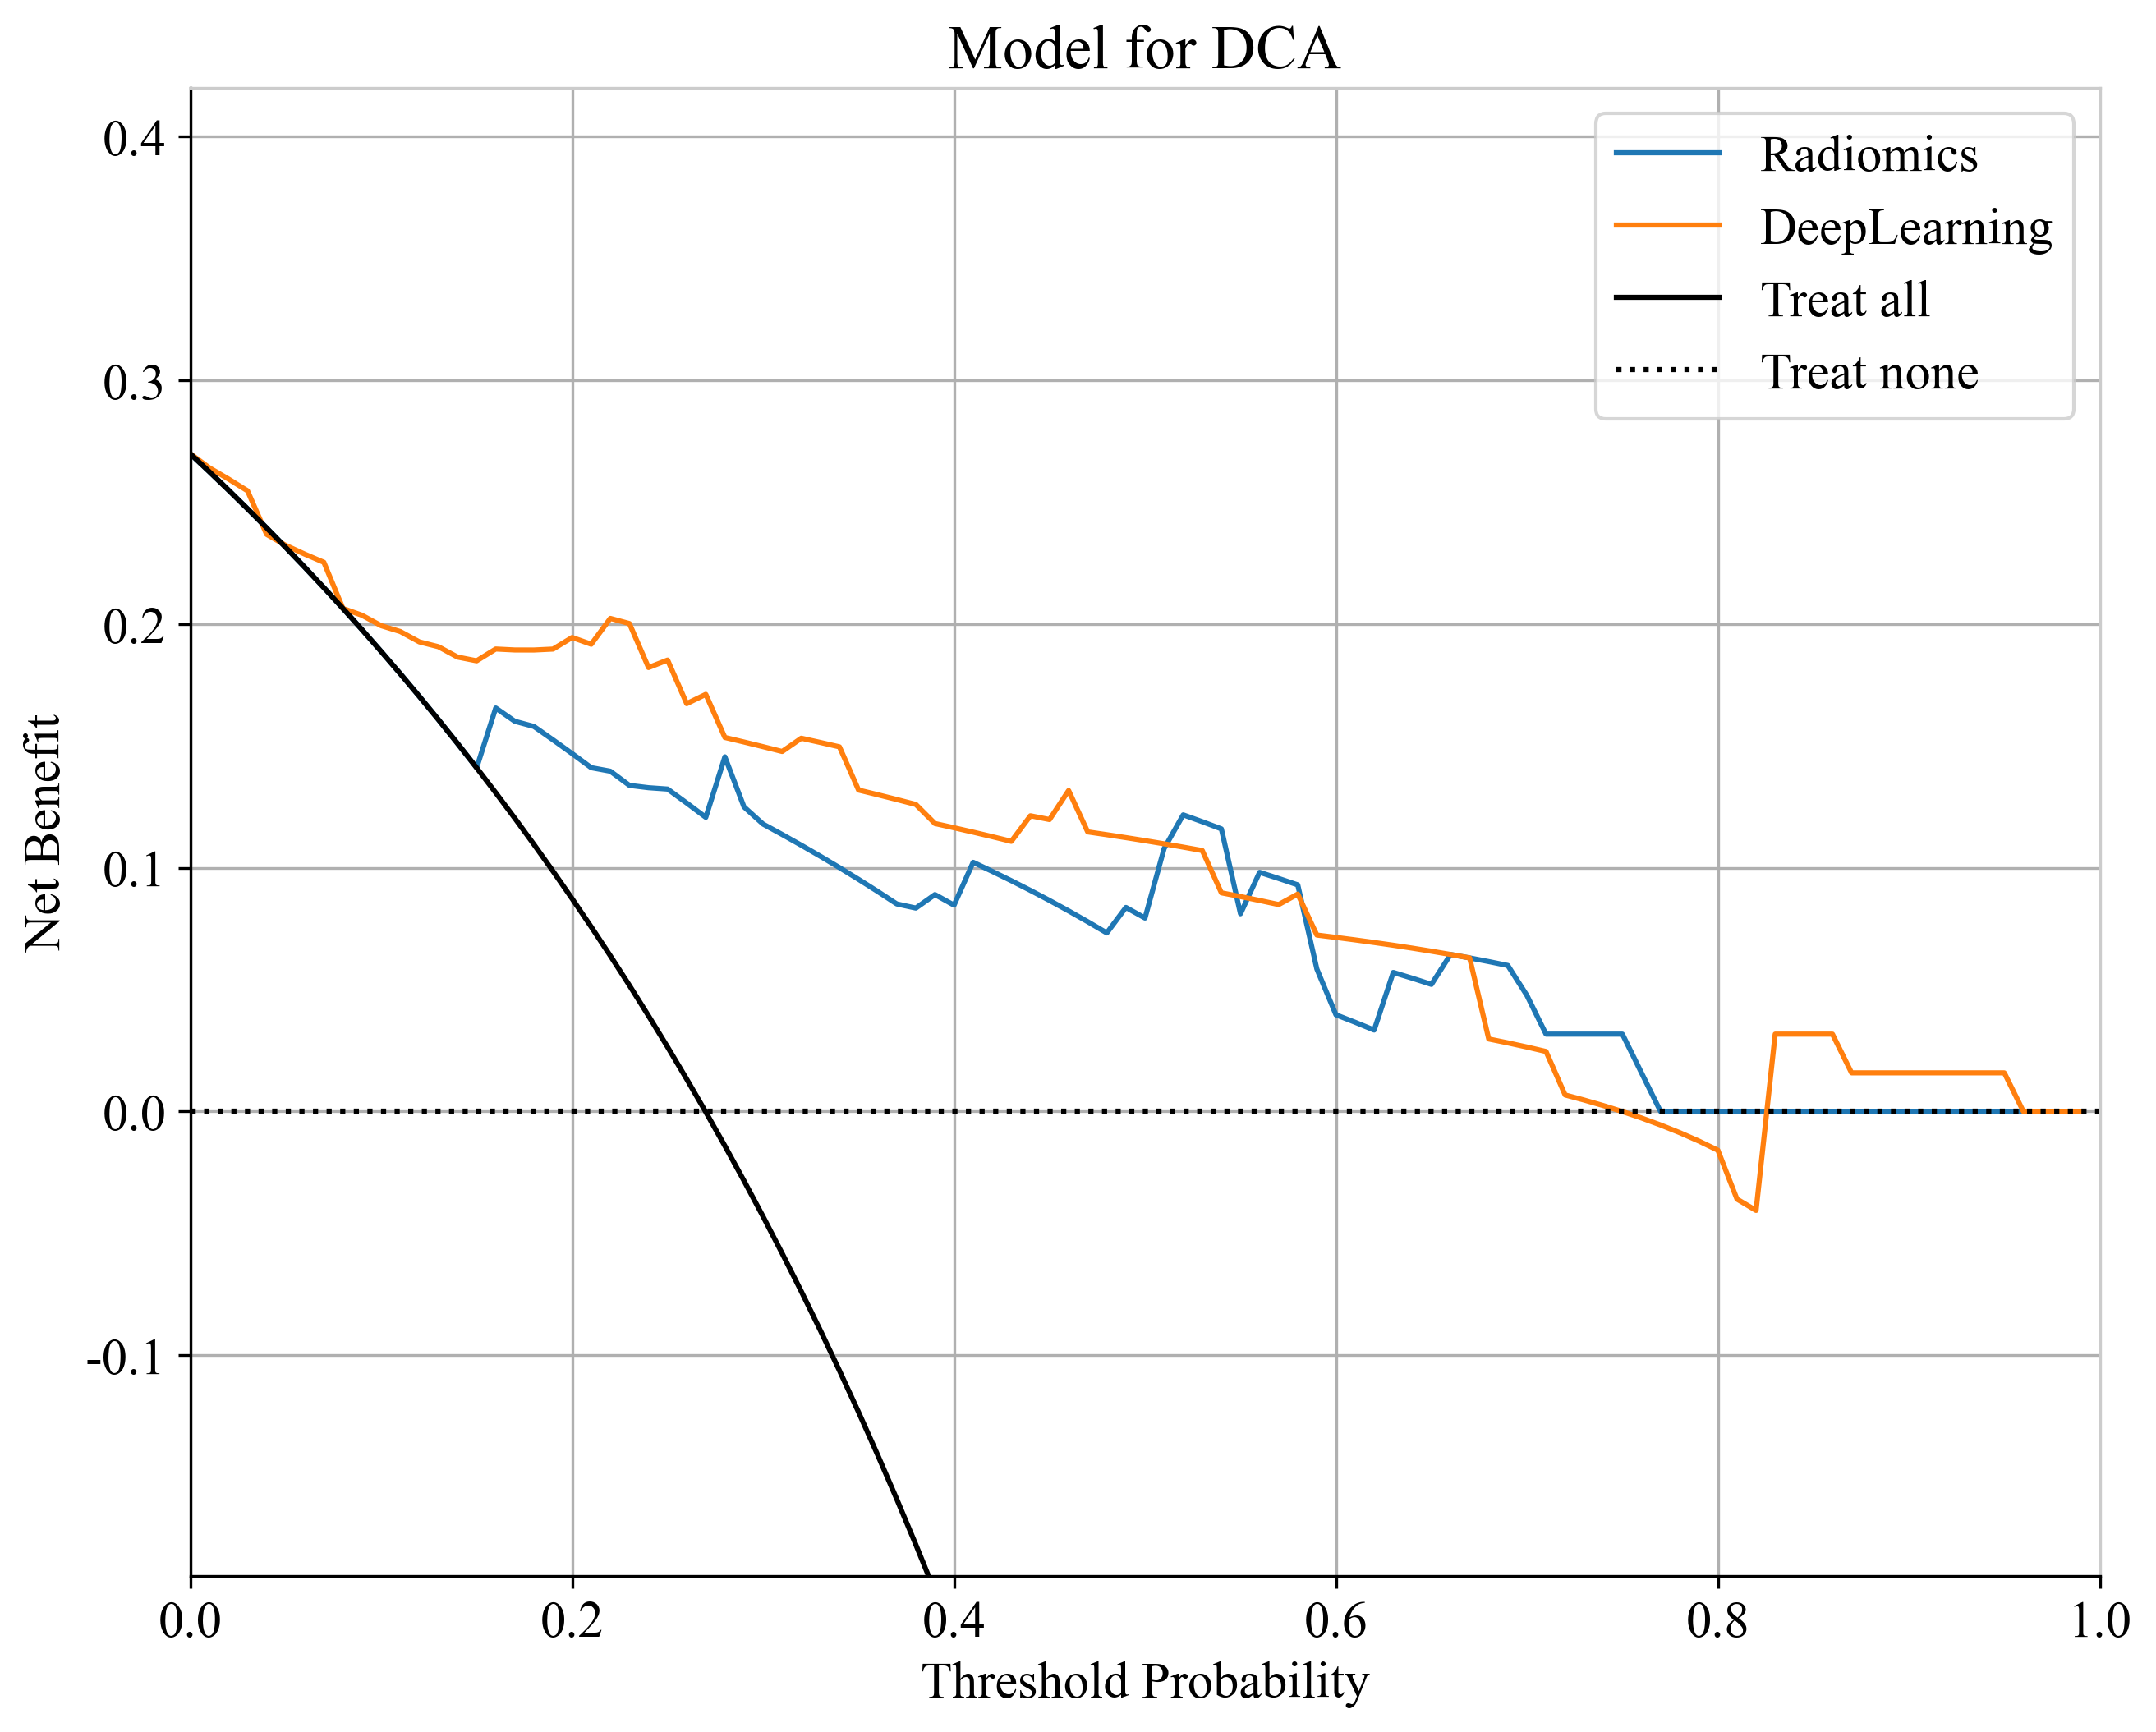

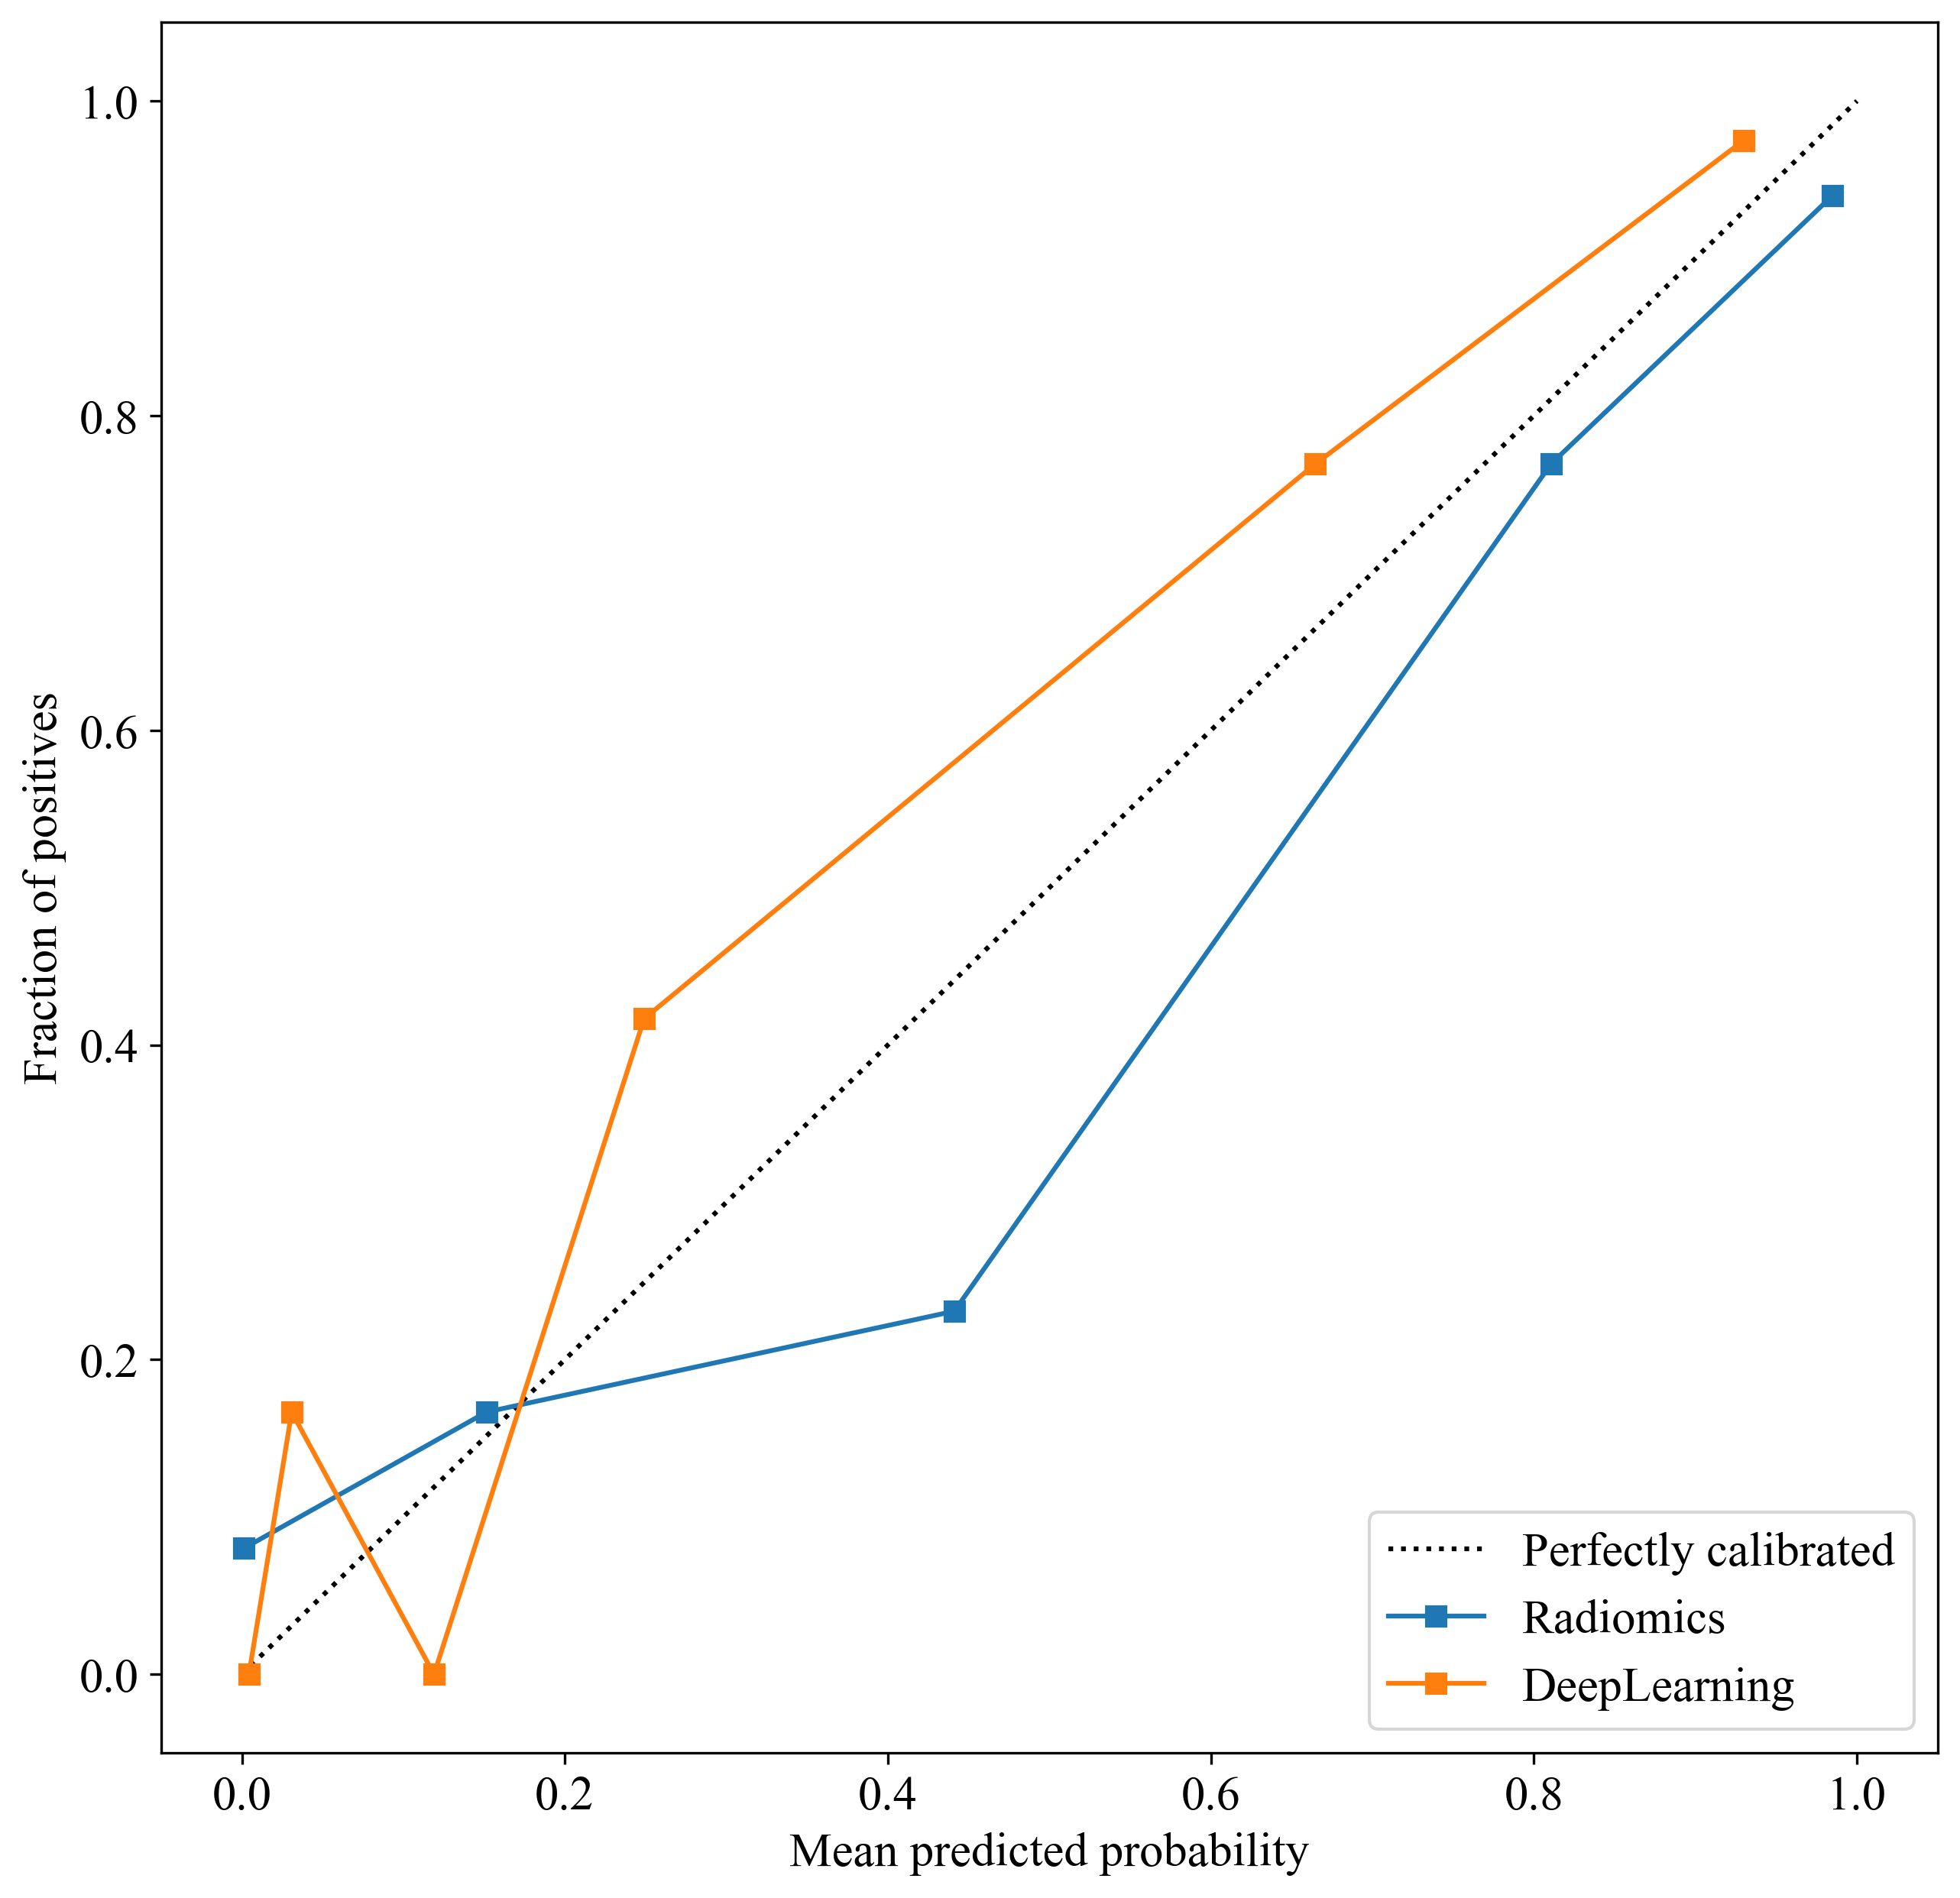

,ID,-0_x,Radiomics,-0_y,DeepLearning,label
0,Chen-Li-P00350776.nii.gz,0.646,0.354,0.629,0.371,0
1,Chen-Shuxiang-P00364924.nii.gz,0.845,0.155,0.999,0.001,0
2,Gong-Chengxia-P00327752.nii.gz,0.845,0.155,0.959,0.041,0
3,GUO_YU_HONG_P00170691.nii.gz,0.845,0.155,0.808,0.192,0
4,He-Qingmo-P00326419.nii.gz,0.845,0.155,0.947,0.053,0
...,...,...,...,...,...,...
75,ZHAO_ZHANG_ZHI_P00206369.nii.gz,0.723,0.277,0.988,0.012,0
76,Zhou_Fu_Yong_P00464123.nii.gz,0.412,0.588,0.539,0.461,1
77,ZHOU_RONG_P00306340.nii.gz,0.845,0.155,0.935,0.065,0
78,ZHUANG_ZHI_MIN_P00322774.nii.gz,0.320,0.680,0.794,0.206,0


,Signature,Accuracy,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Cohort
0,Radiomics,0.890,0.953,0.9147 - 0.9918,0.929,0.881,0.650,0.981,0.650,0.929,0.765,0.486,train
1,DeepLearning,0.815,0.899,0.8378 - 0.9594,0.786,0.822,0.512,0.942,0.512,0.786,0.620,0.207,train
2,Radiomics,0.825,0.833,0.7067 - 0.9595,0.588,0.913,0.714,0.857,0.714,0.588,0.645,0.546,val
3,DeepLearning,0.825,0.880,0.7802 - 0.9794,0.824,0.826,0.636,0.927,0.636,0.824,0.718,0.236,val
4,Radiomics,0.775,0.803,0.6930 - 0.9127,0.722,0.790,0.500,0.907,0.500,0.722,0.591,0.450,test
5,DeepLearning,0.850,0.880,0.7780 - 0.9818,0.722,0.887,0.650,0.917,0.650,0.722,0.684,0.417,test


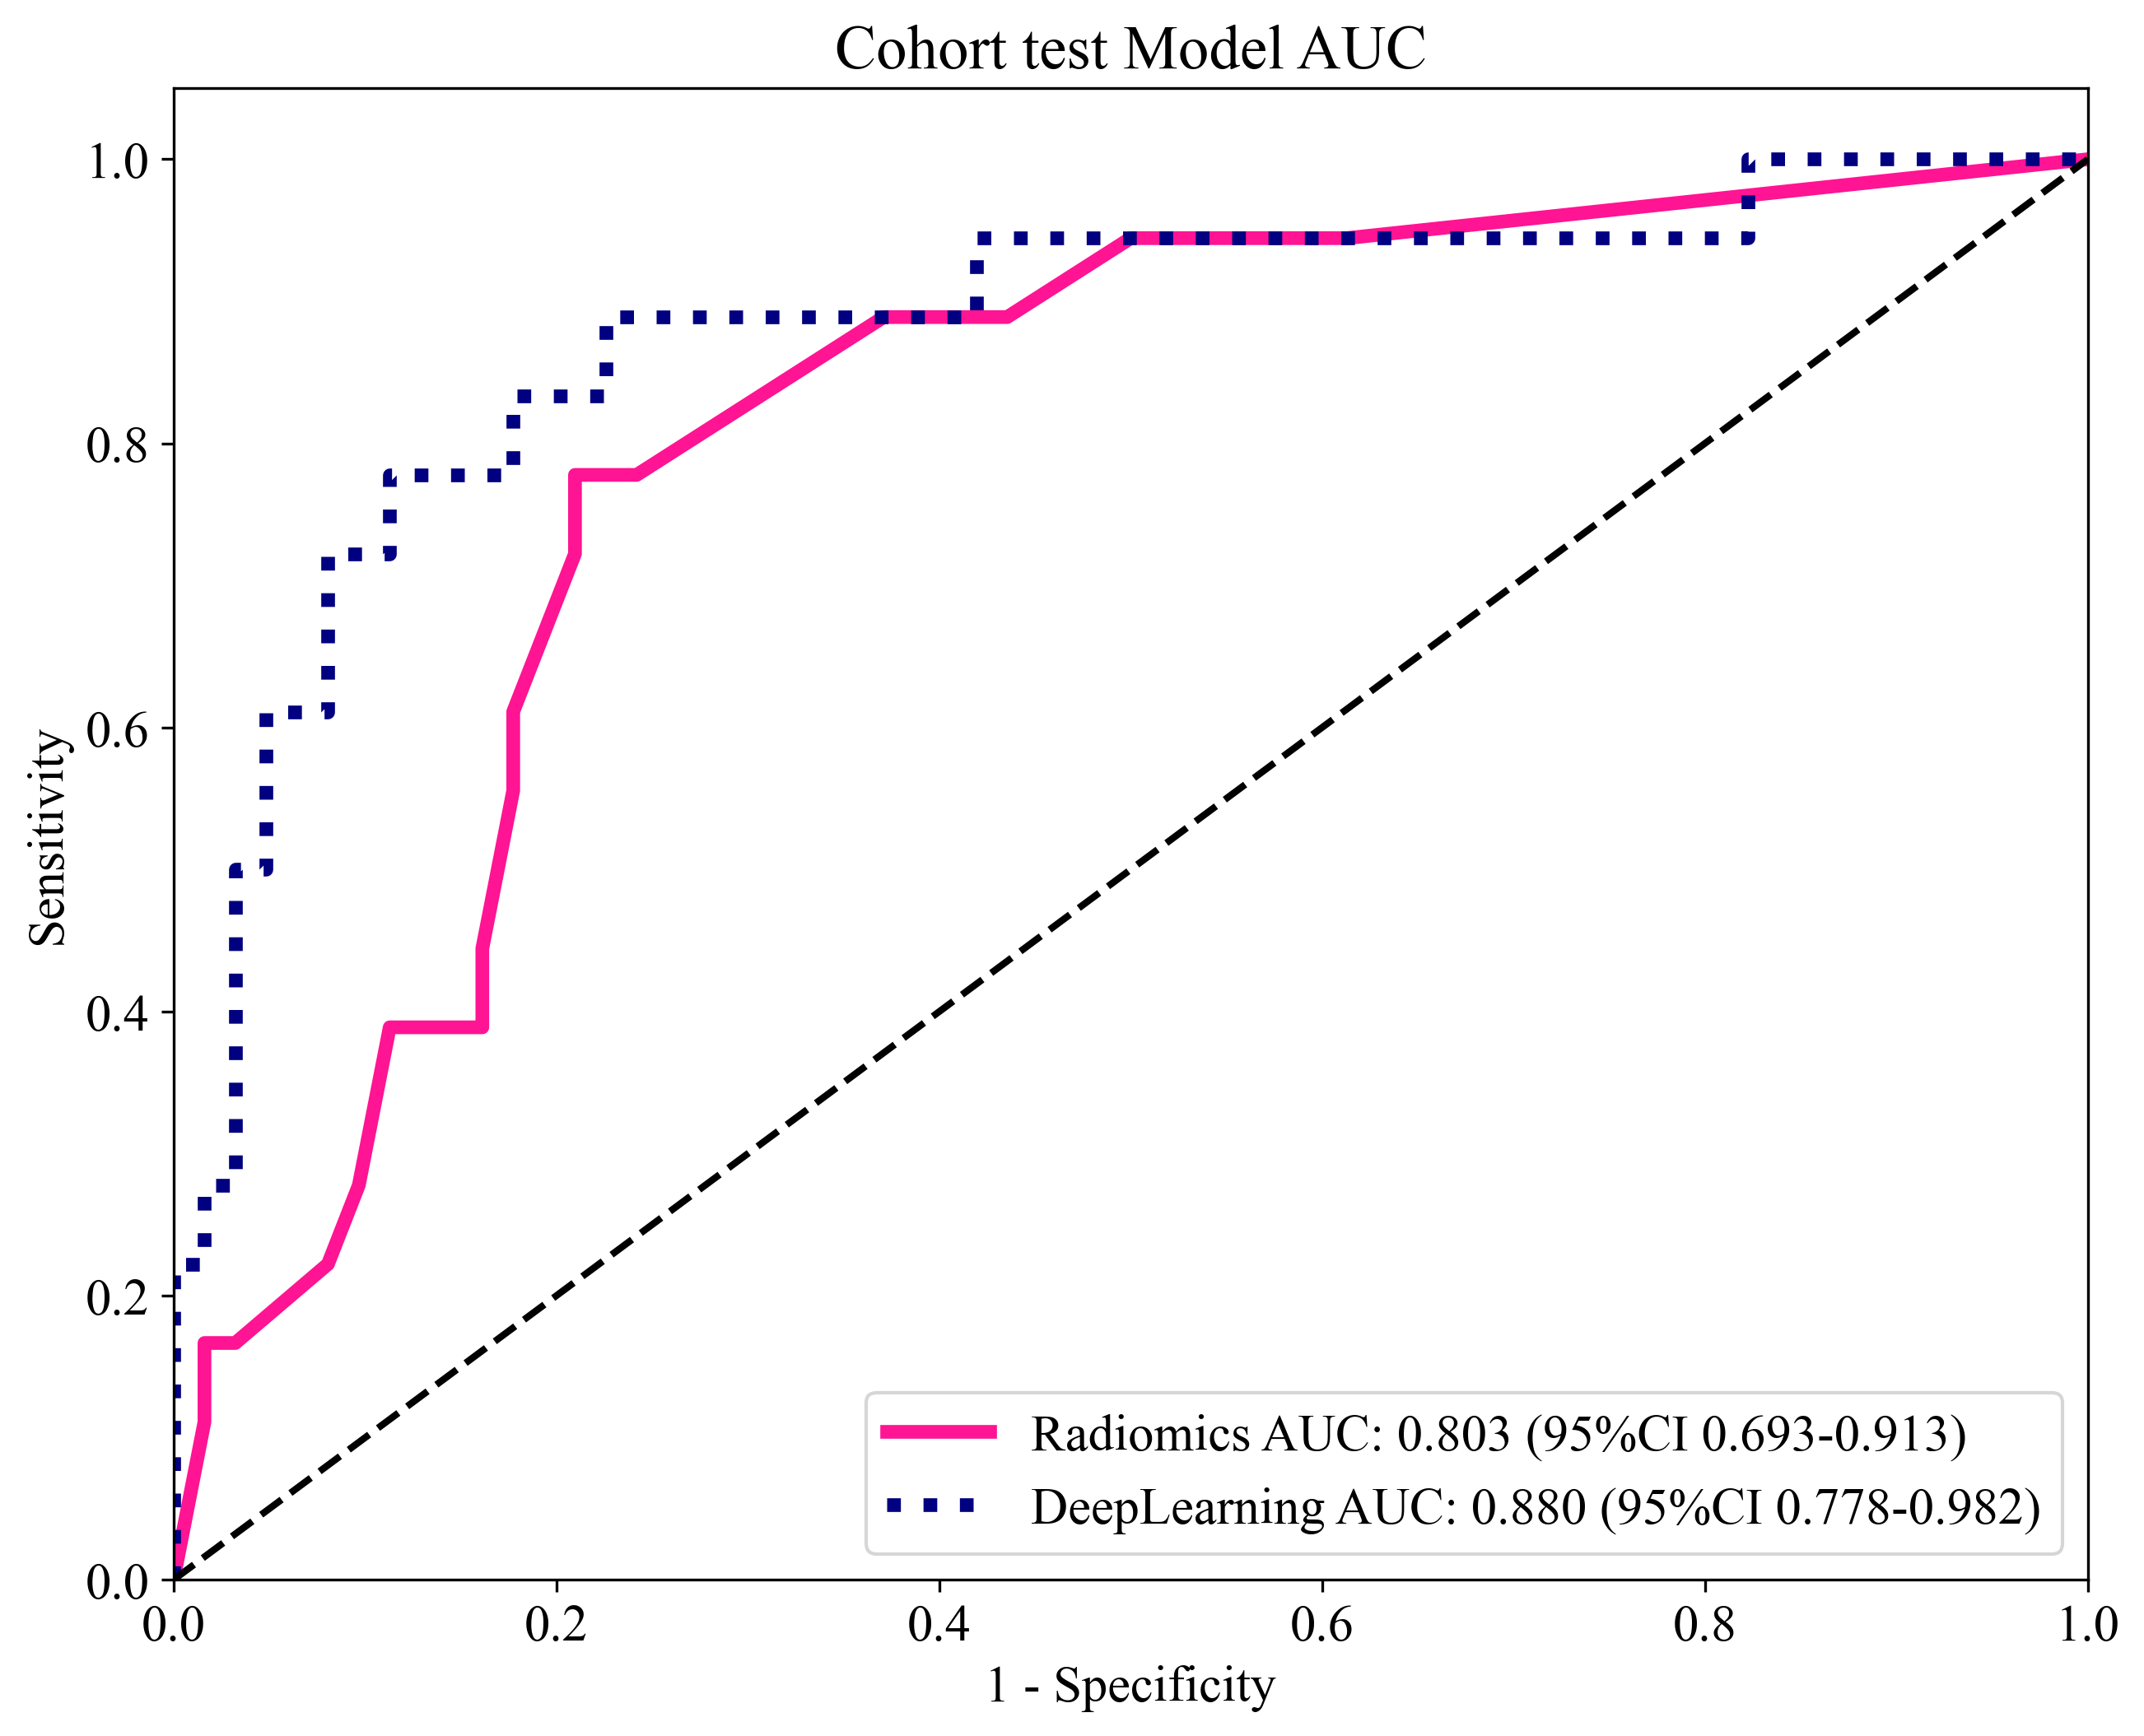

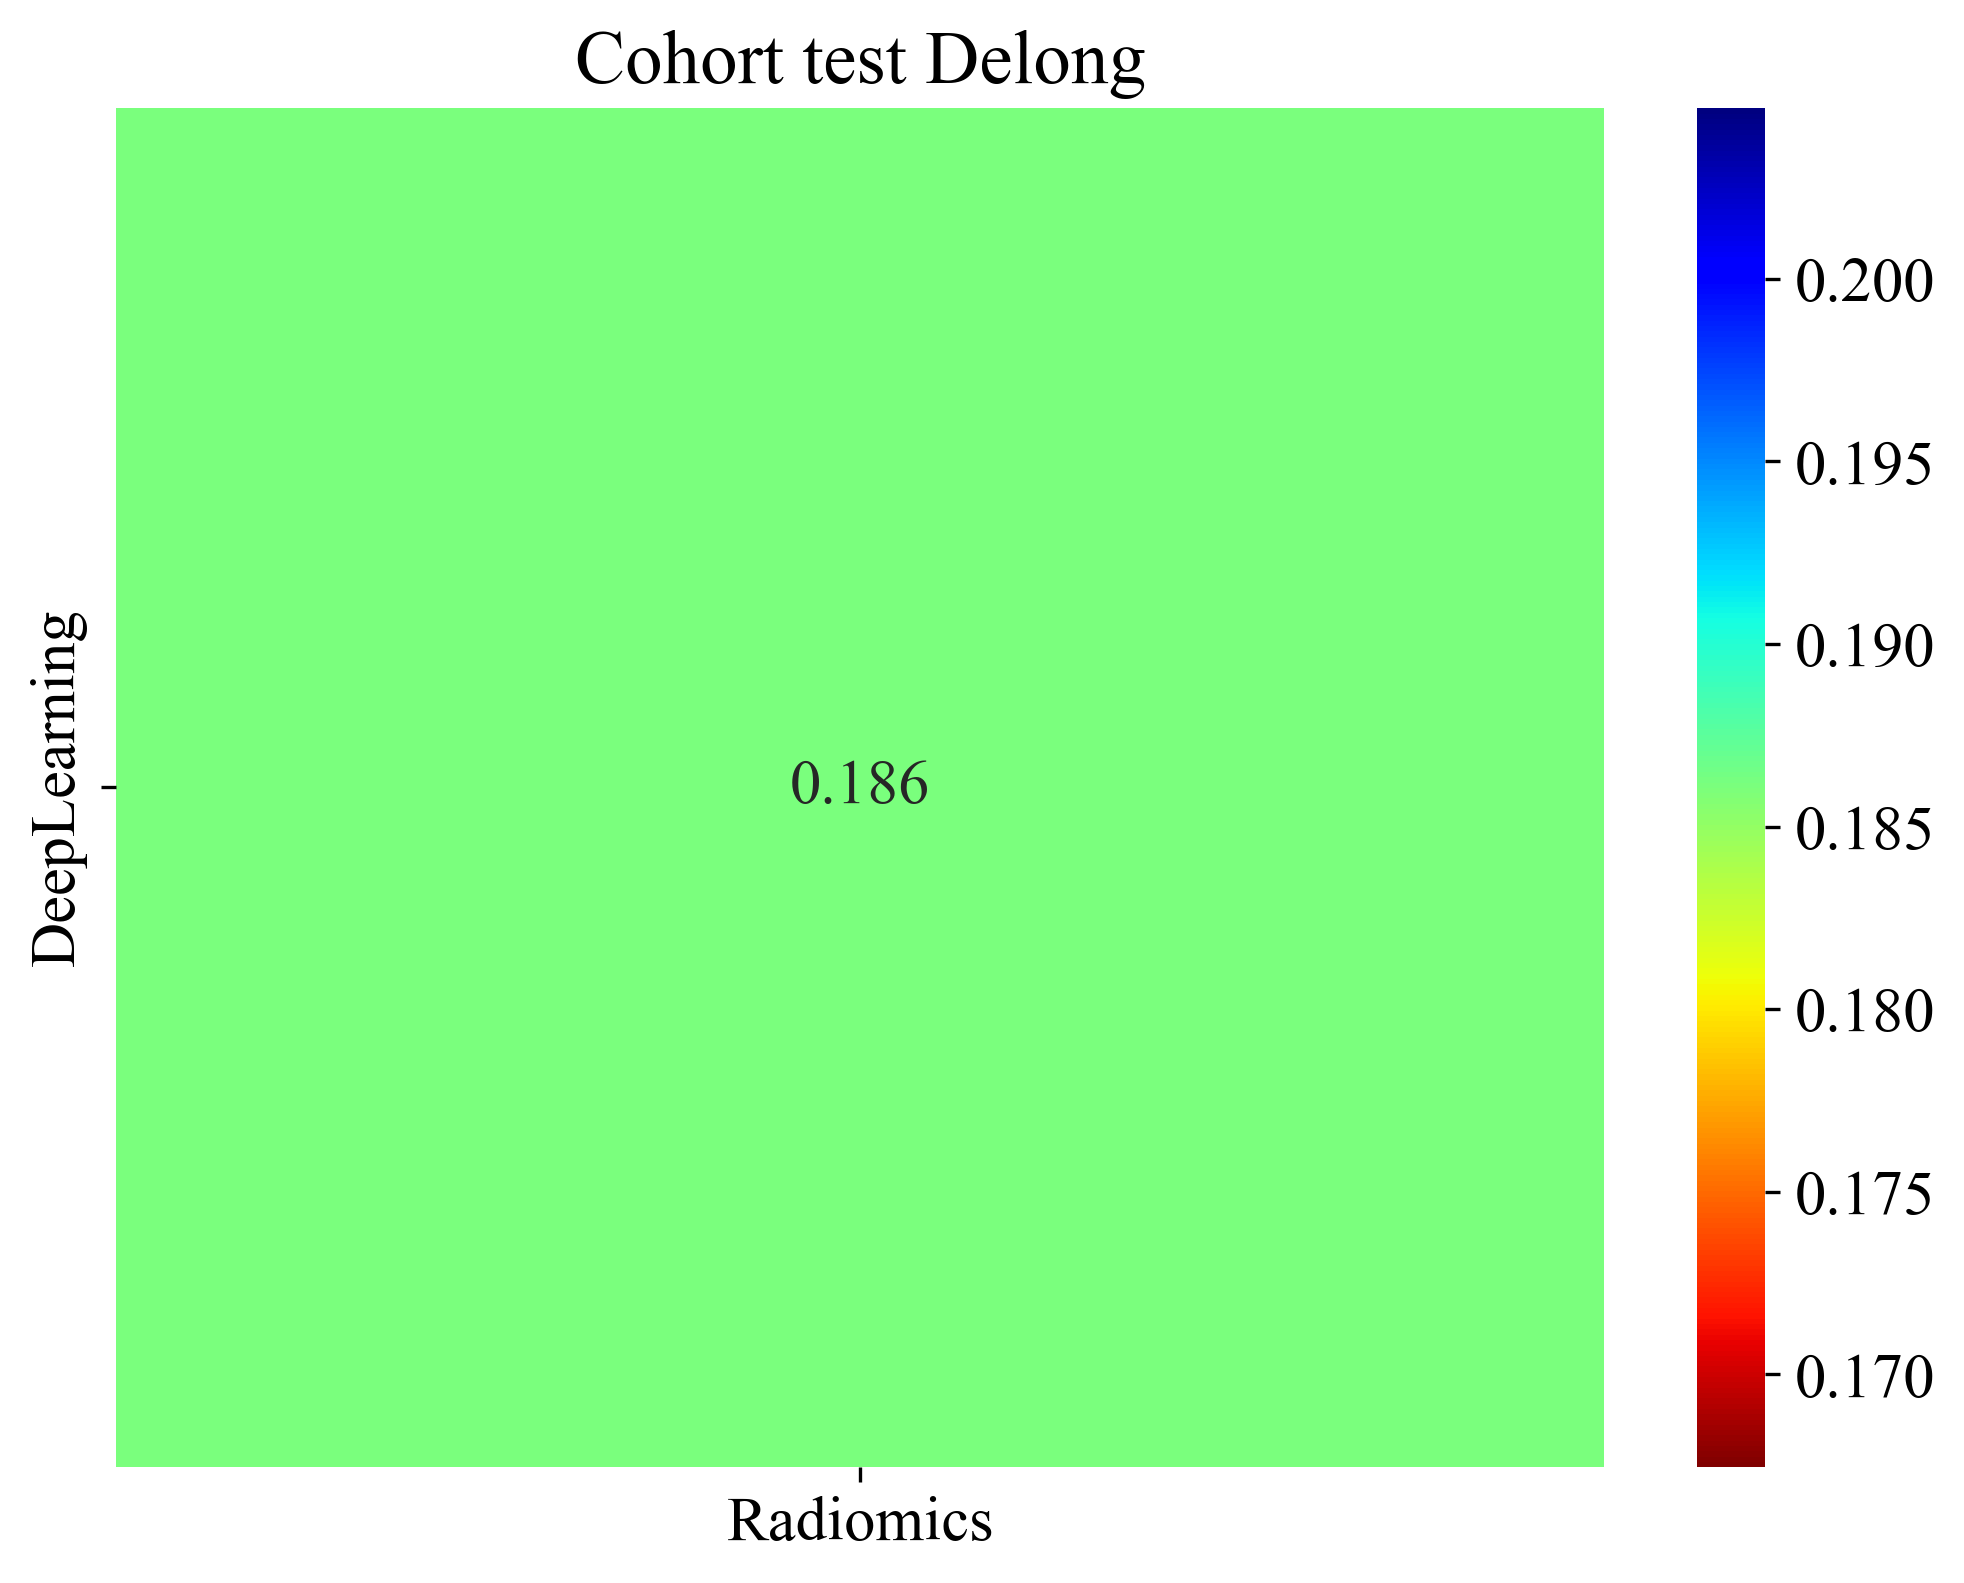

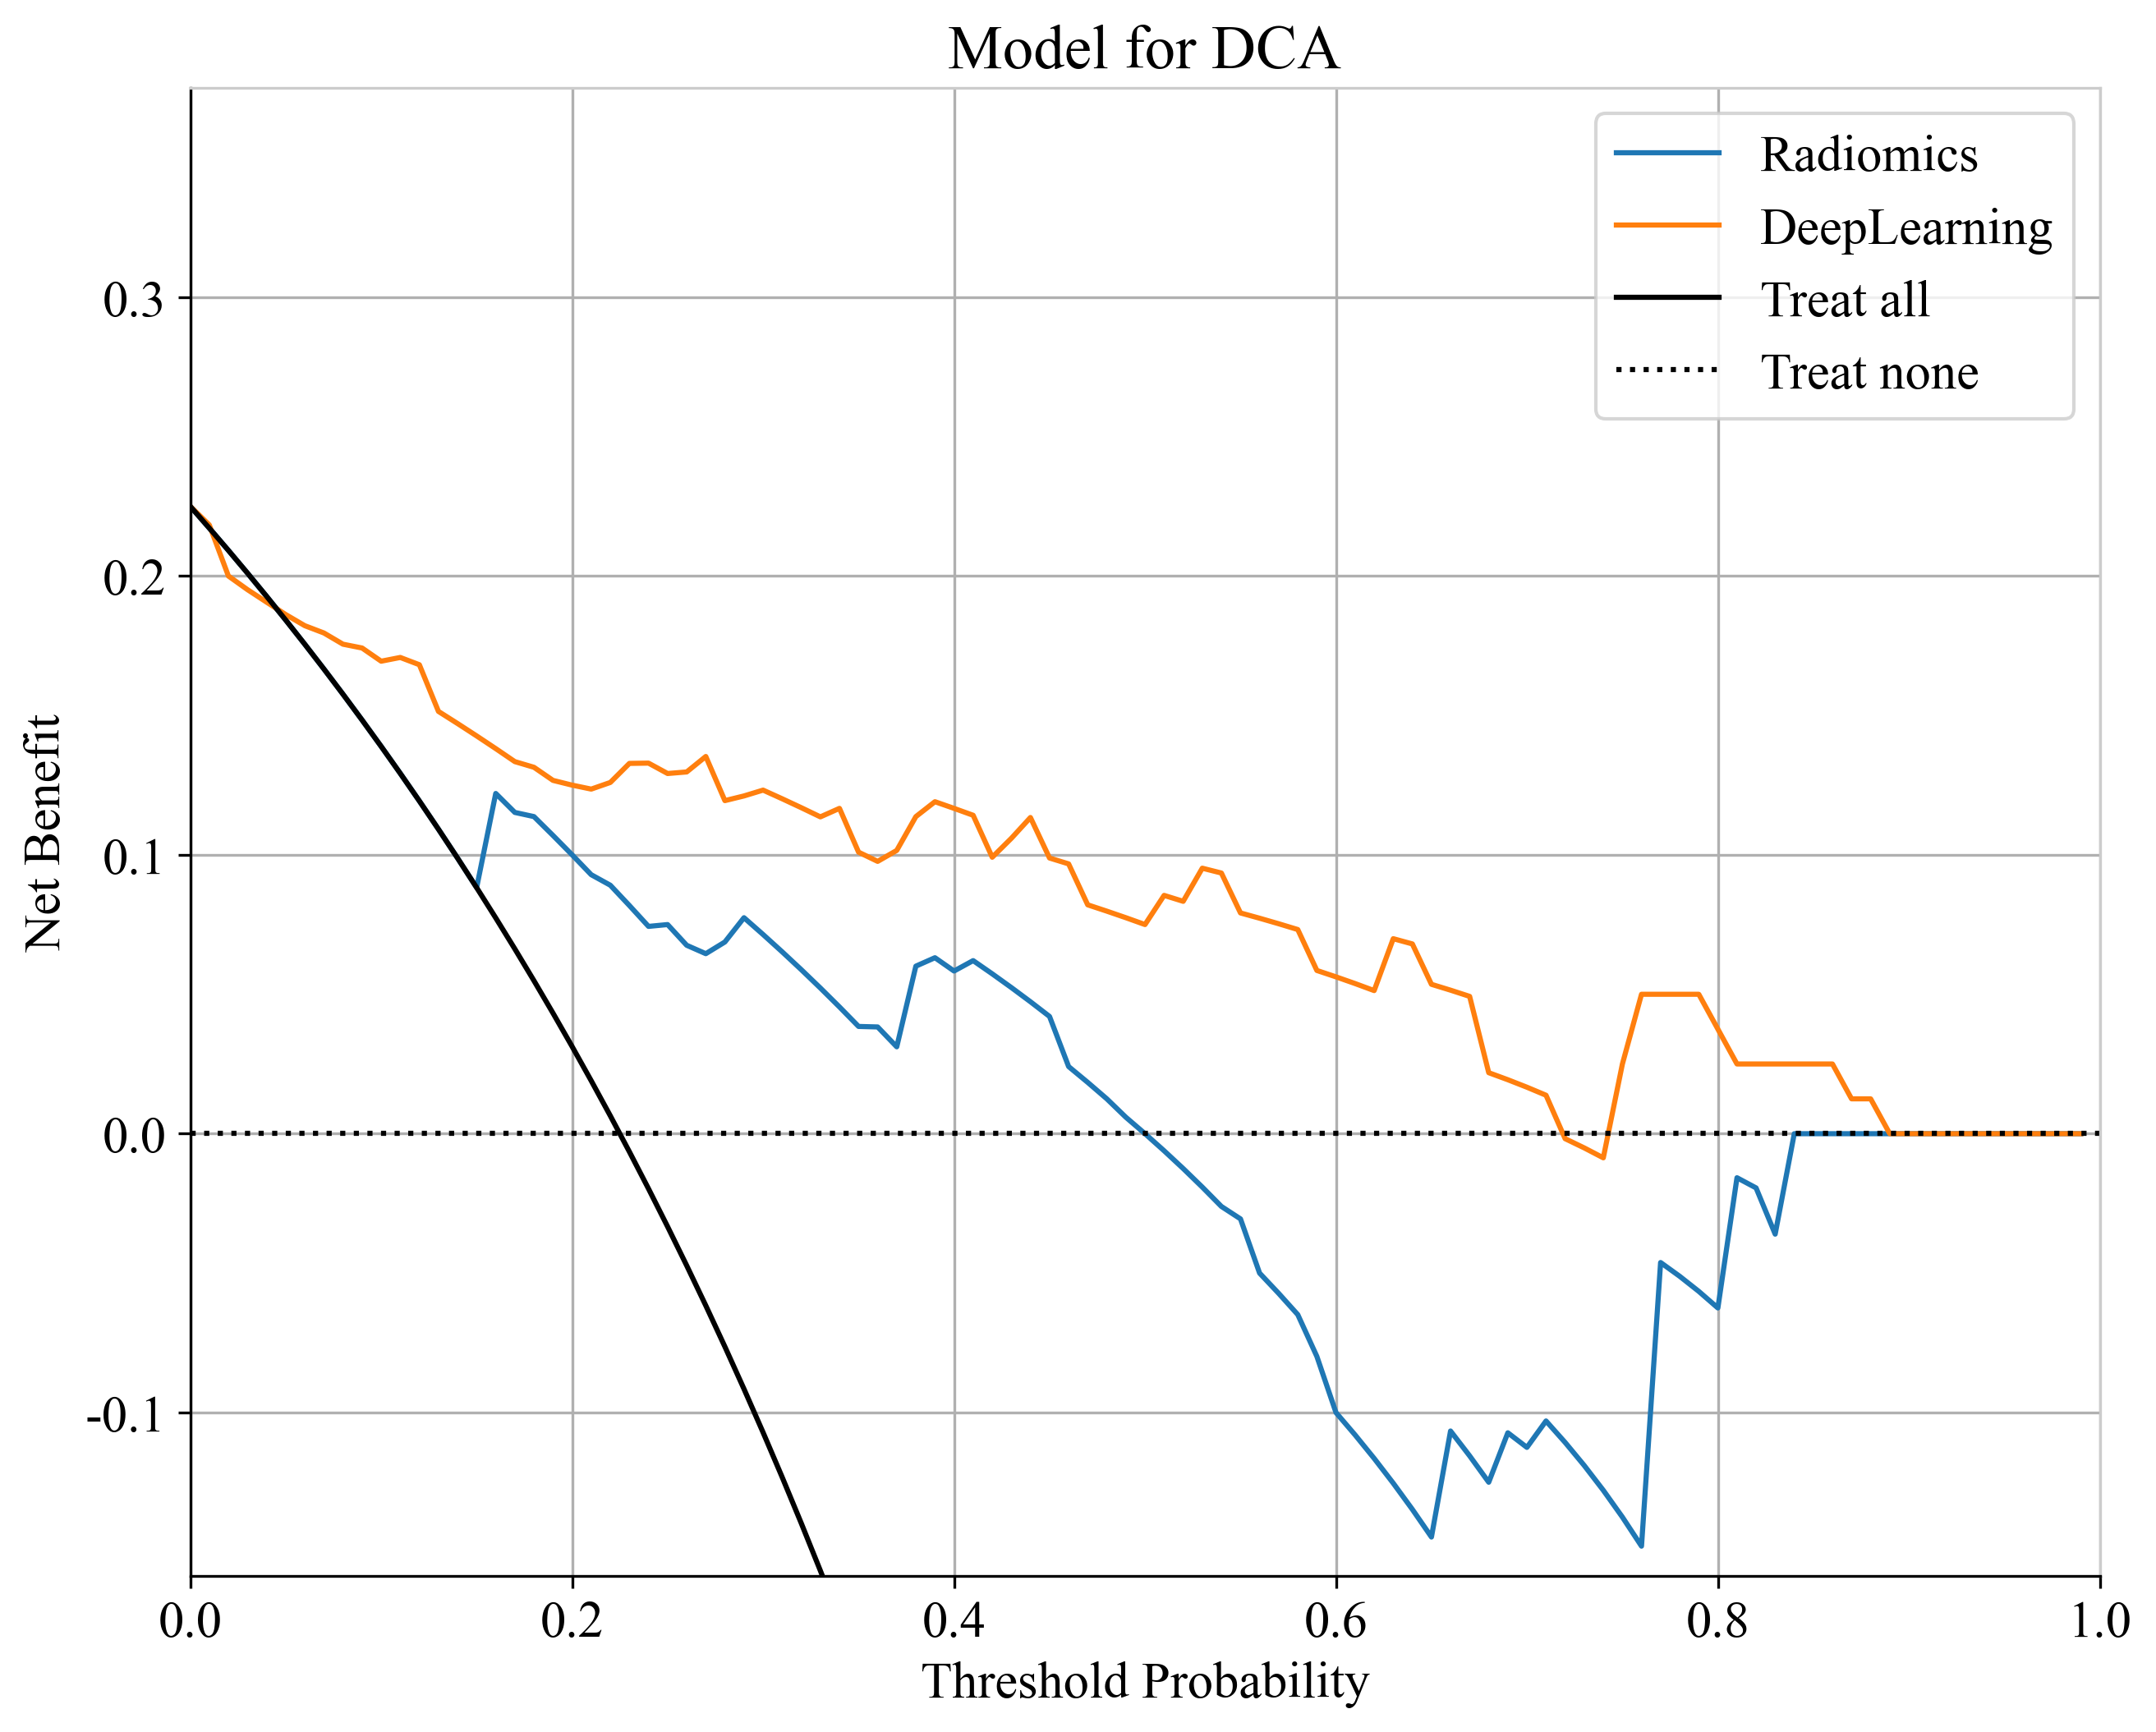

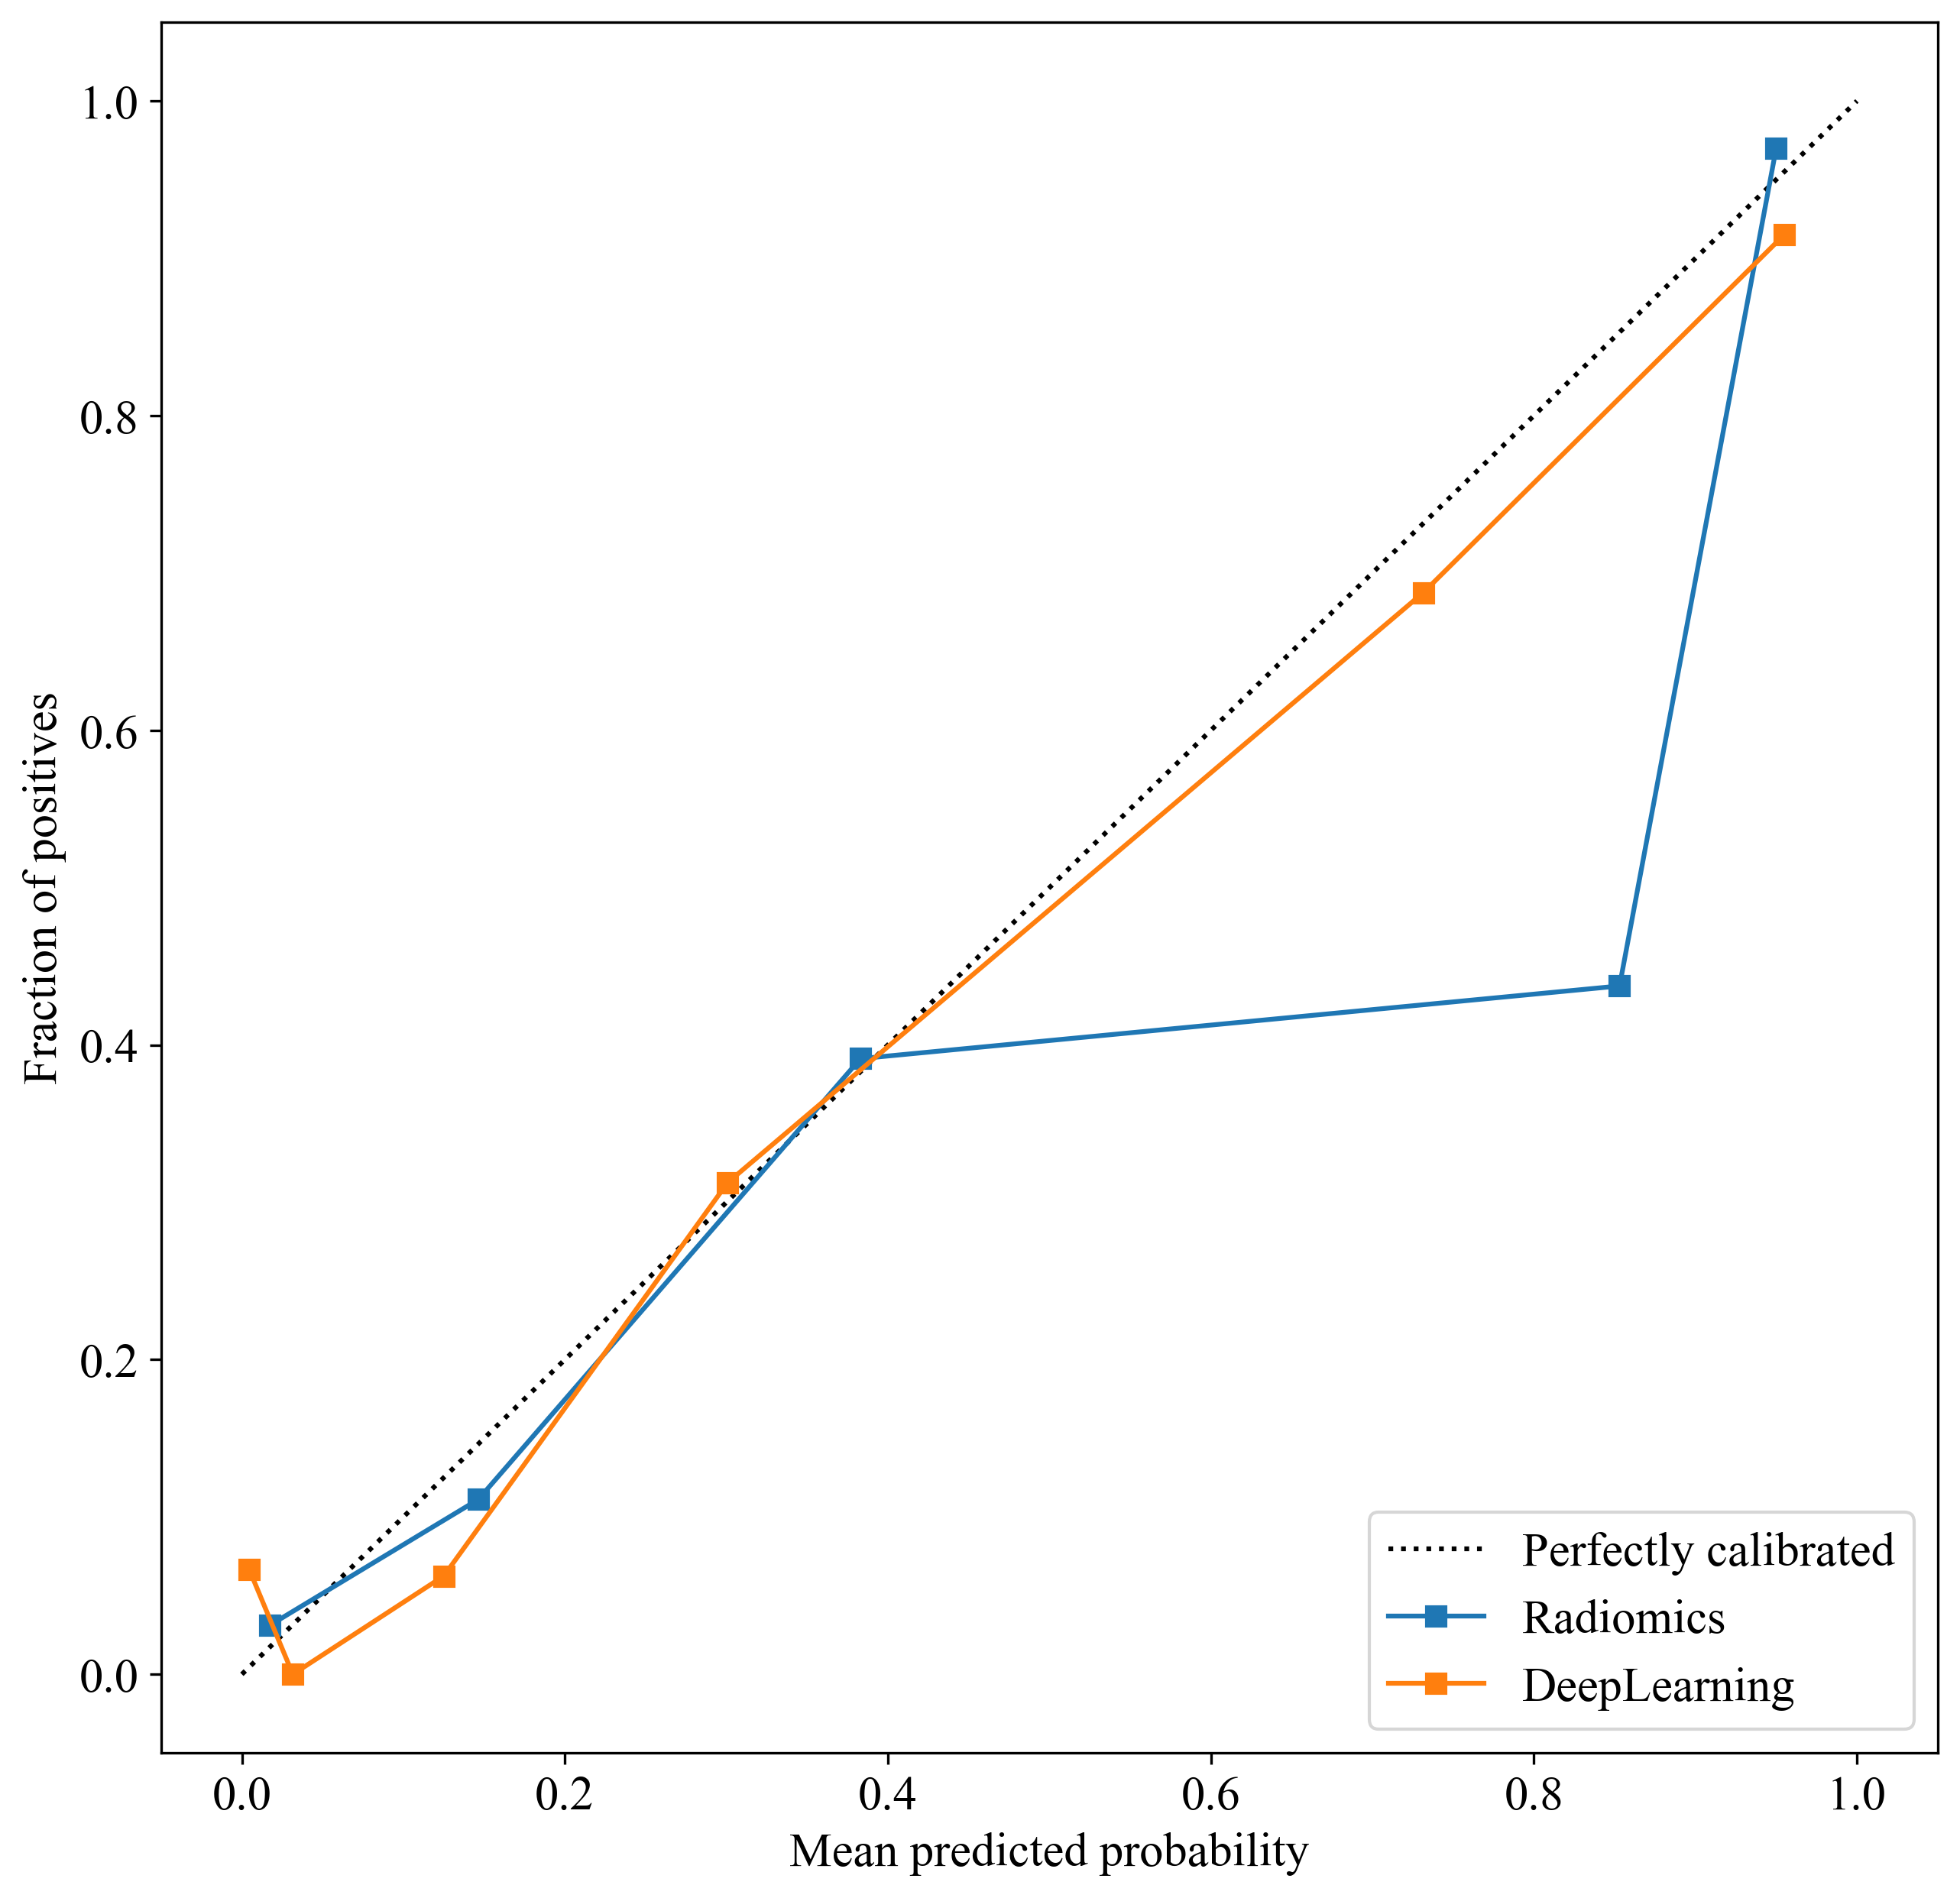

,Radiomics,DeepLearning,Cohort
0,0.999,0.828,train
1,0.996,0.852,val
2,1.000,0.911,test


In [10]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics

from onekey_algo.custom.components.metrics import analysis_pred_binary
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
# from onekey_algo.custom.components import nomogram
import shutil

metric = []
hosmer = []
model = None
mn_map = {'INTRA': 'Radiomics', 'DL': 'DeepLearning'}
for subset in get_param_in_cwd('subsets'):
    model_names = get_param_in_cwd('summary_model')
    ALL_results = None
    for mn in model_names:
        r = pd.read_csv(f'./results/{mn}_{bst_model[mn]}_{subset}.csv')
        r.columns = ['ID', '-0', mn_map[mn]]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    model_names = list(mn_map.values())
    ALL_results = pd.merge(ALL_results, label_data, on='ID', how='inner')
#     Clinic = pd.read_csv('clinic_sel.csv')
#     Clinic = Clinic[[c for c in Clinic.columns if c not in [task, group_info]]]
#     ALL_results = pd.merge(ALL_results, Clinic, on='ID', how='inner')
    display(ALL_results)
    ALL_results = ALL_results.dropna(axis=1)
    ALL_results

    # model = SVC(probability=True, random_state=0)
#     data_x = ALL_results[list(Clinic.columns[1:]) + model_names[-2:-1]]
#     data_y = ALL_results[task]
#     if model is None or True:
#         model = LogisticRegression(random_state=0, penalty='none')
#         model.fit(data_x, data_y)
#     results = model.predict_proba(data_x)
#     results = pd.DataFrame(results, index=ALL_results['ID'], columns=[f'{task}-0', f'{task}-1']).reset_index()
#     results.to_csv(f'./results/Nomo_{subset}.csv', index=False, header=True)
#     pred_column = [f'{task}-0', f'{task}-1']
#     results.columns = ['ID', '-0', model_names[-1]]
#     ALL_results = pd.merge(ALL_results, results, on='ID', how='inner')
    
    gt = [np.array(ALL_results[task]) for d in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f"Cohort {subset} Model AUC")
    plt.savefig(f'img/{subset}_auc.svg')

    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score, use_youden=True)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{subset}"))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                        'Sensitivity', 'Specificity', 
                                                        'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                        'Threshold', 'Cohort'])

    display(metric_)
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=(8, 6))
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/delong_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()

    plot_DCA([ALL_results[mn] for mn in model_names], ALL_results[task], title=f'Model for DCA', 
             remap=False,# EX={"n_estimators": 5, 'max_depth': 1}, #idx_set=3,
             labels=model_names)
    plt.savefig(f'img/{subset}_dca.svg')
    plt.show()

    draw_calibration(pred_scores=pred_train, n_bins=5, y_test=gt, remap=True, add_1=True,# EX={"n_estimators": 5, 'max_depth': 1}, 
                     model_names=model_names)
    plt.savefig(f'img/{subset}_cali.svg')
    plt.show()

    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, remap=True, bins=50) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
#     if subset.lower() == 'train':
#         nomo = nomogram.risk_nomogram(ALL_results, result=task, columns=list(Clinic.columns[1:]) + model_names[-2:-1], 
#                                       width=8000, height=5000, x_range='0.01,0.25,0.5,0.75,0.99')
#         display(nomo)
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)